In [138]:
import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
# from matplotlib.patches import Polygon
from shapely.geometry import Polygon


import yfinance as yf
import os

In [188]:
def clamp_gradient_smooth(series, window_size=120):
    smoothed = series.rolling(window=window_size, center=True, min_periods=30).mean()
    gradient = np.gradient(smoothed)
    clamped = np.where(gradient > 0, 1, np.where(gradient < 0, -1, 0))
    return pd.Series(clamped, index=series.index, name=series.name)

smooth = lambda x, window_size=120: pd.Series(x).rolling(window=window_size, center=True, min_periods=30).mean()

def calc_area_verts(series):
    indices = np.arange(len(series))
    verts = list(zip(indices, series)) + list(zip(indices[::-1], np.zeros(len(series))))
    verts.append(verts[0])
    return verts

In [189]:
folders = [
    "stocks_to_company_names",
    "stocks_to_keywords_broad",
    "stocks_to_keywords_specific",
]

root_in = "processing"
root_out = "plots"

stocks_to_company_names
Running: AAPL, Apple, plots/stocks_to_company_names


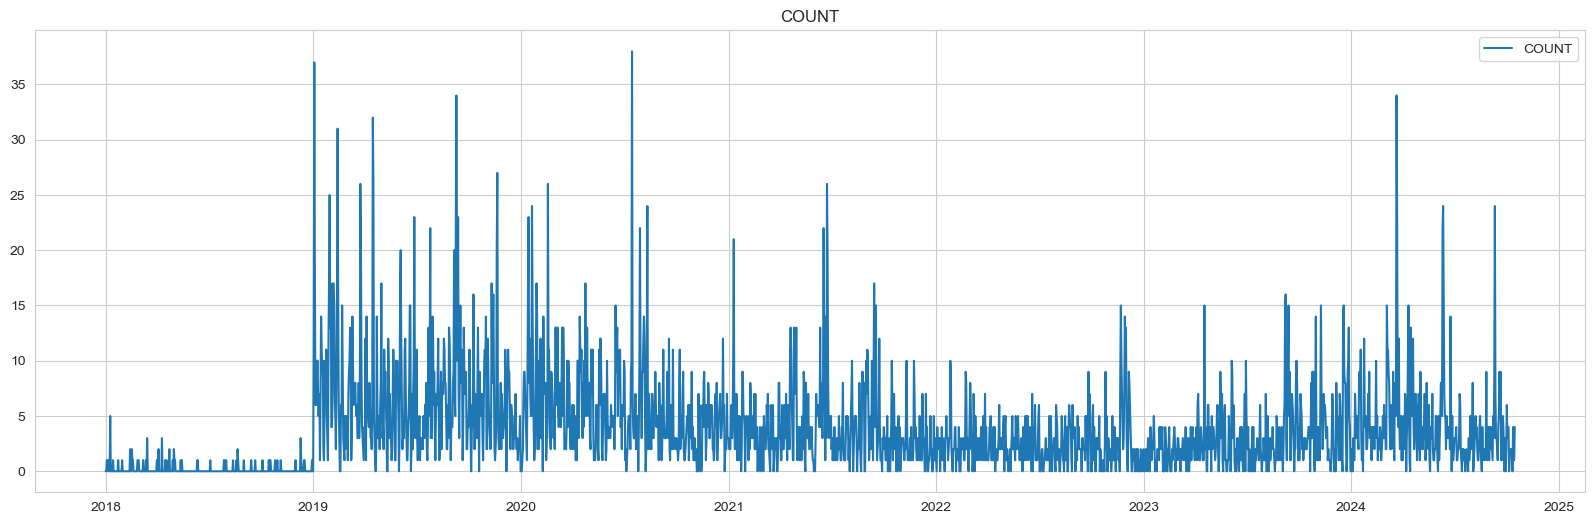

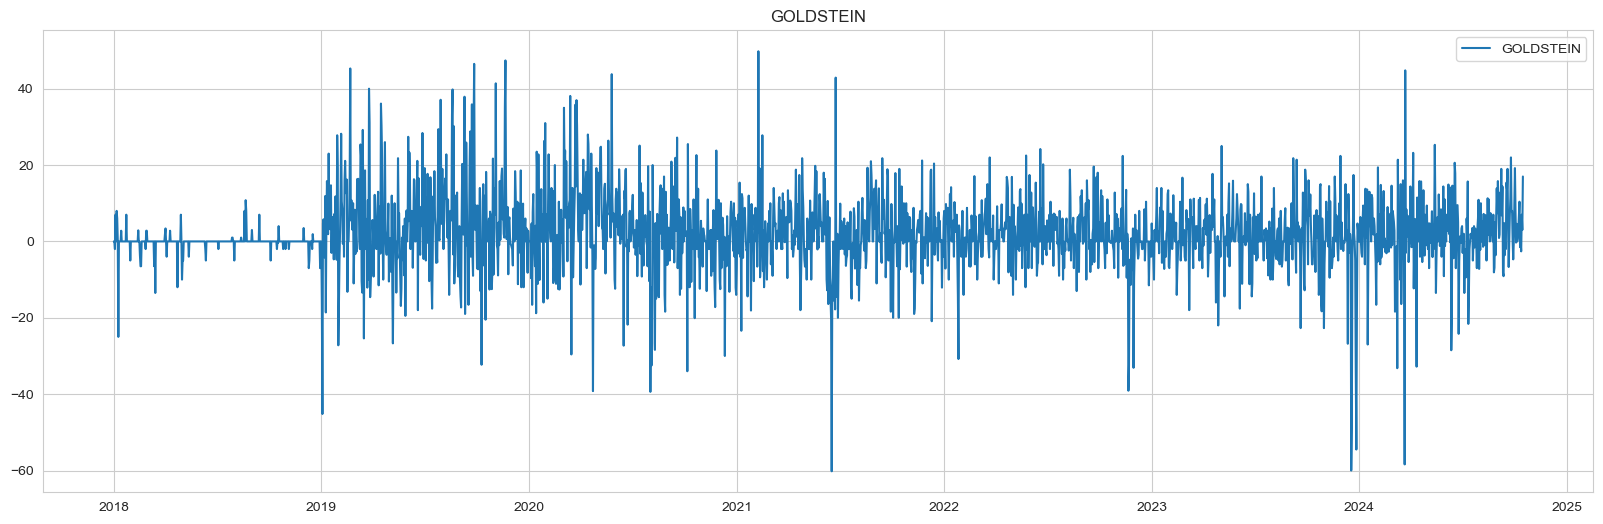

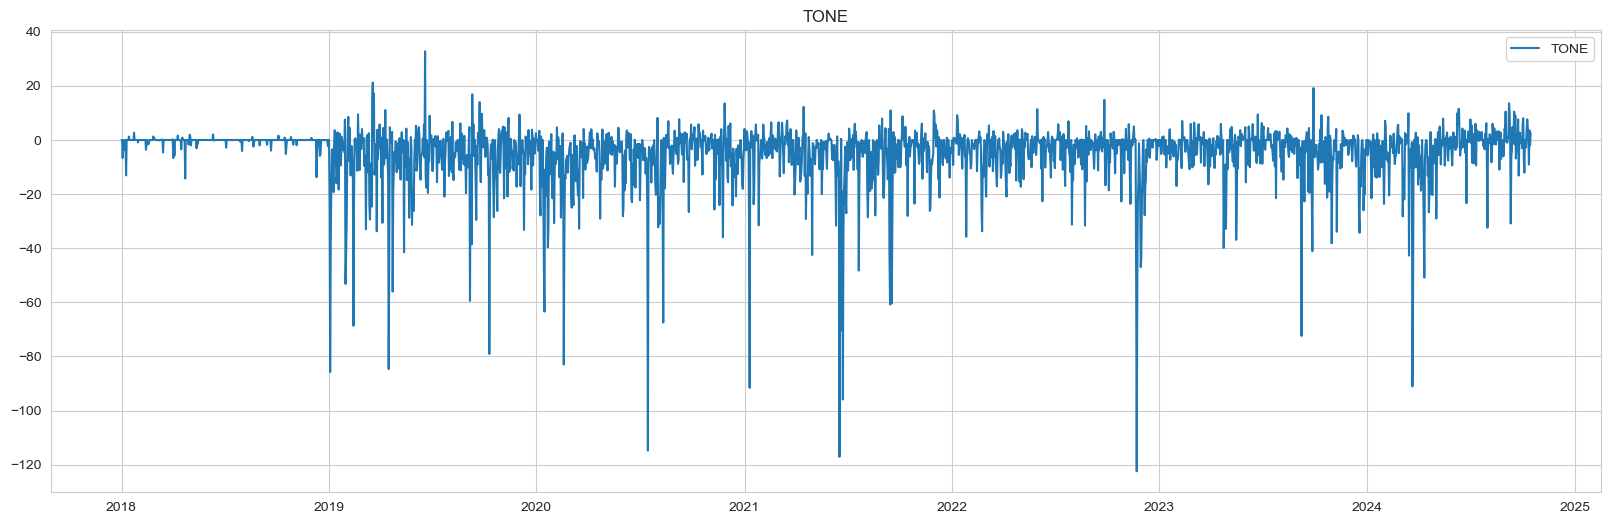

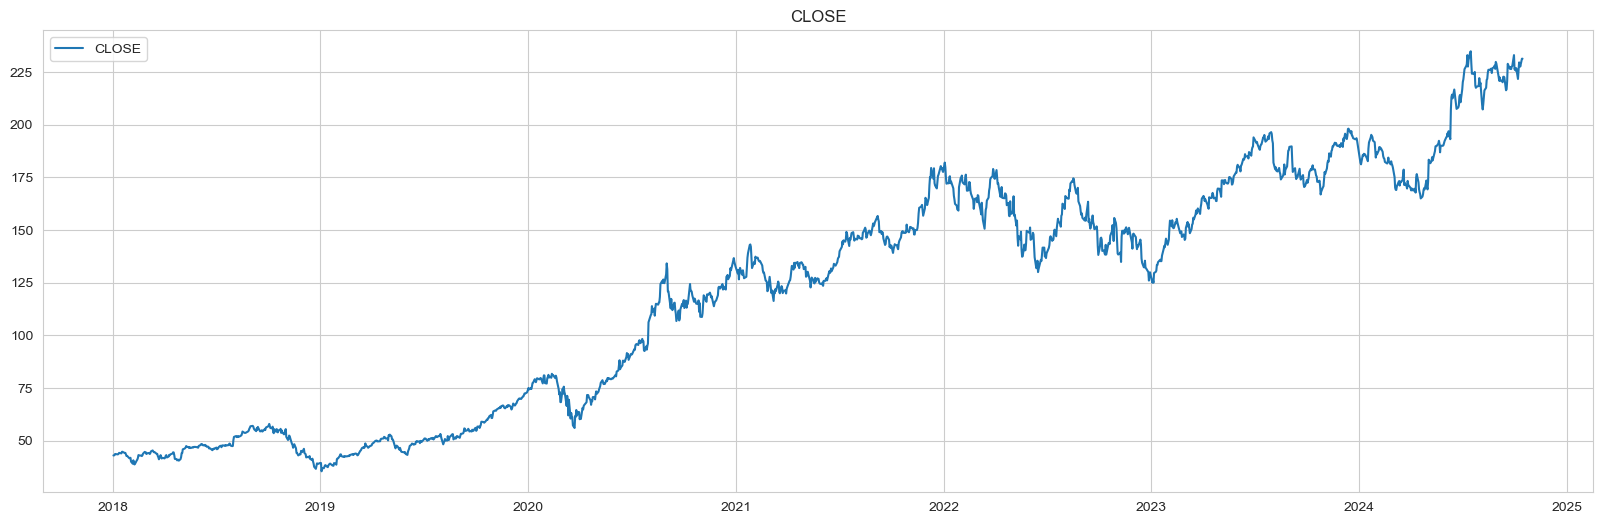

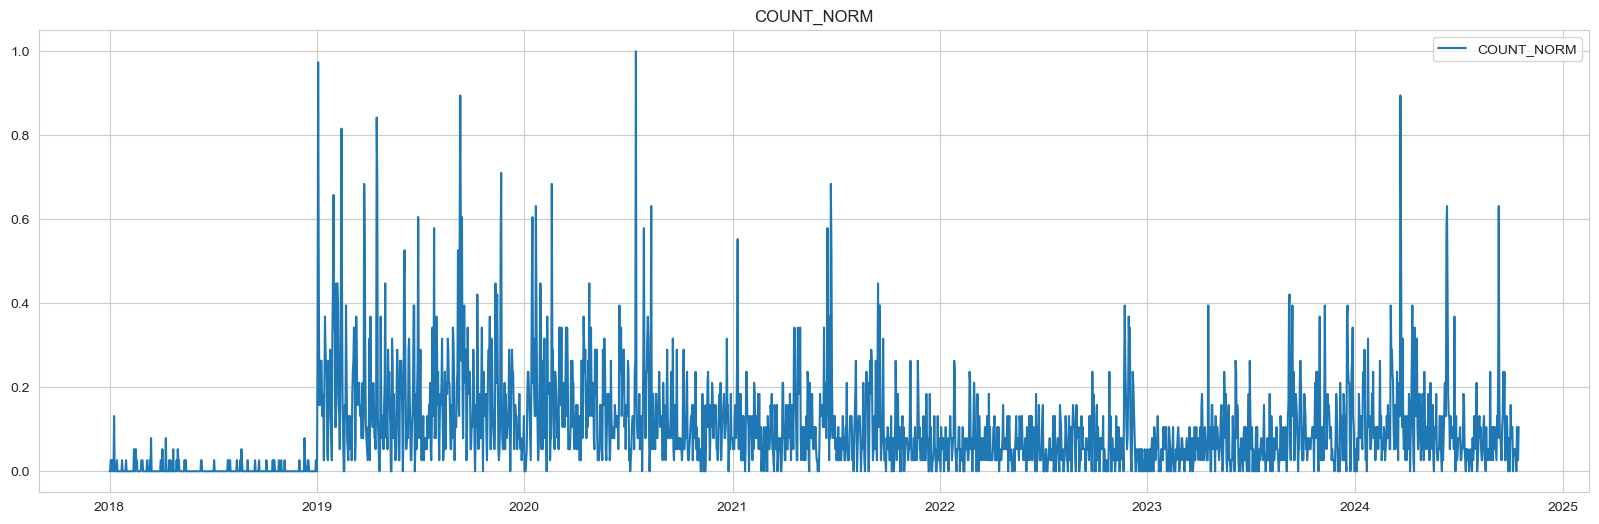

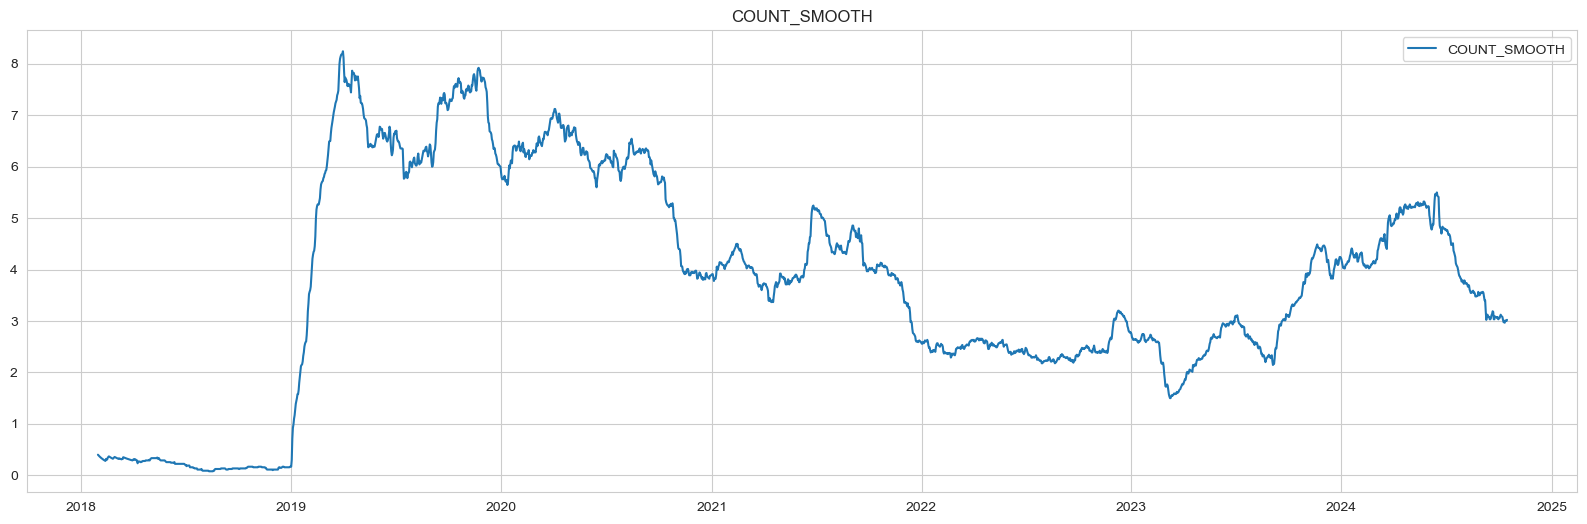

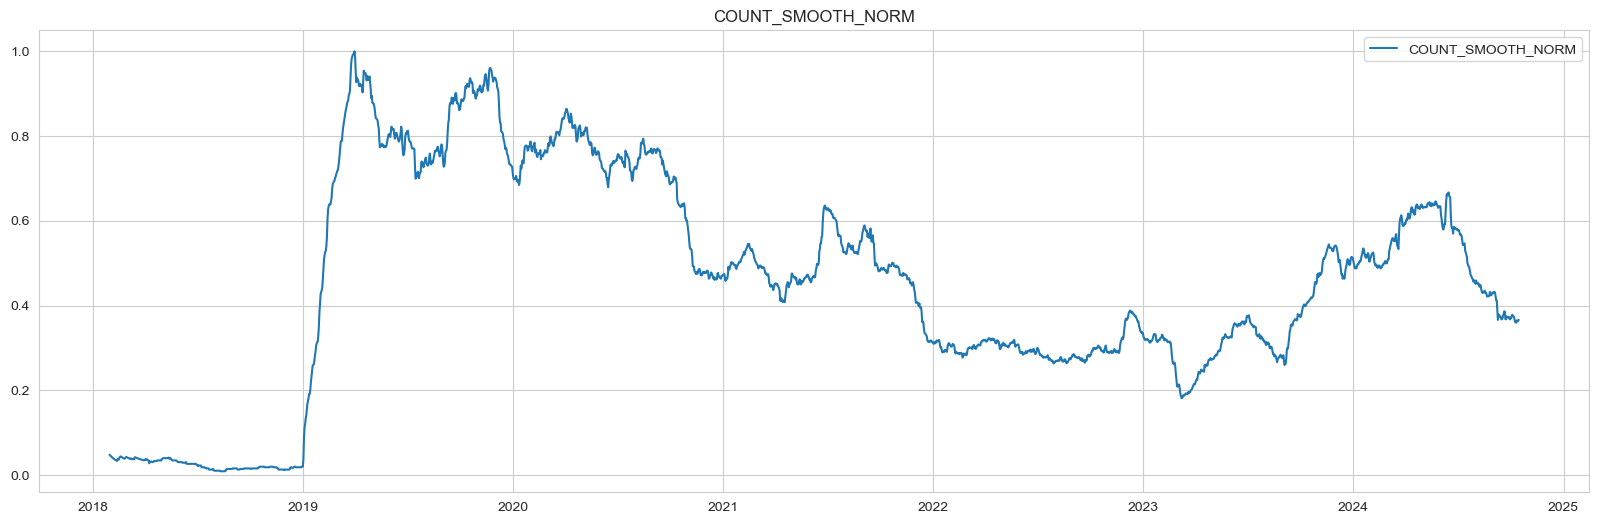

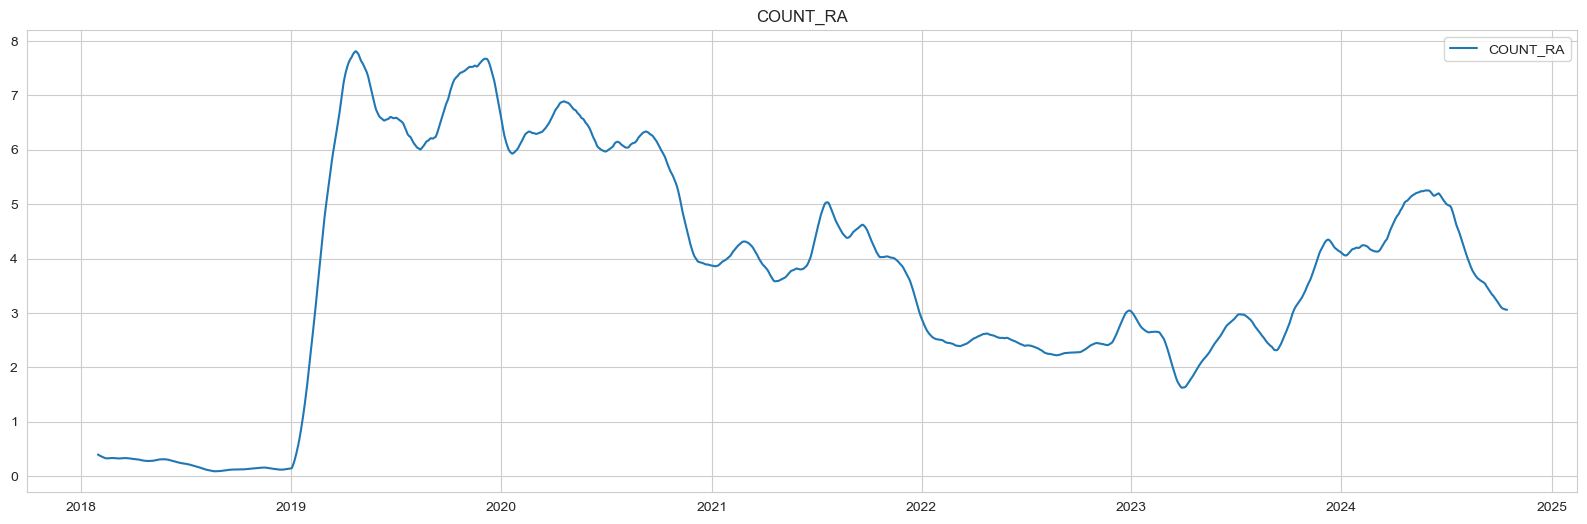

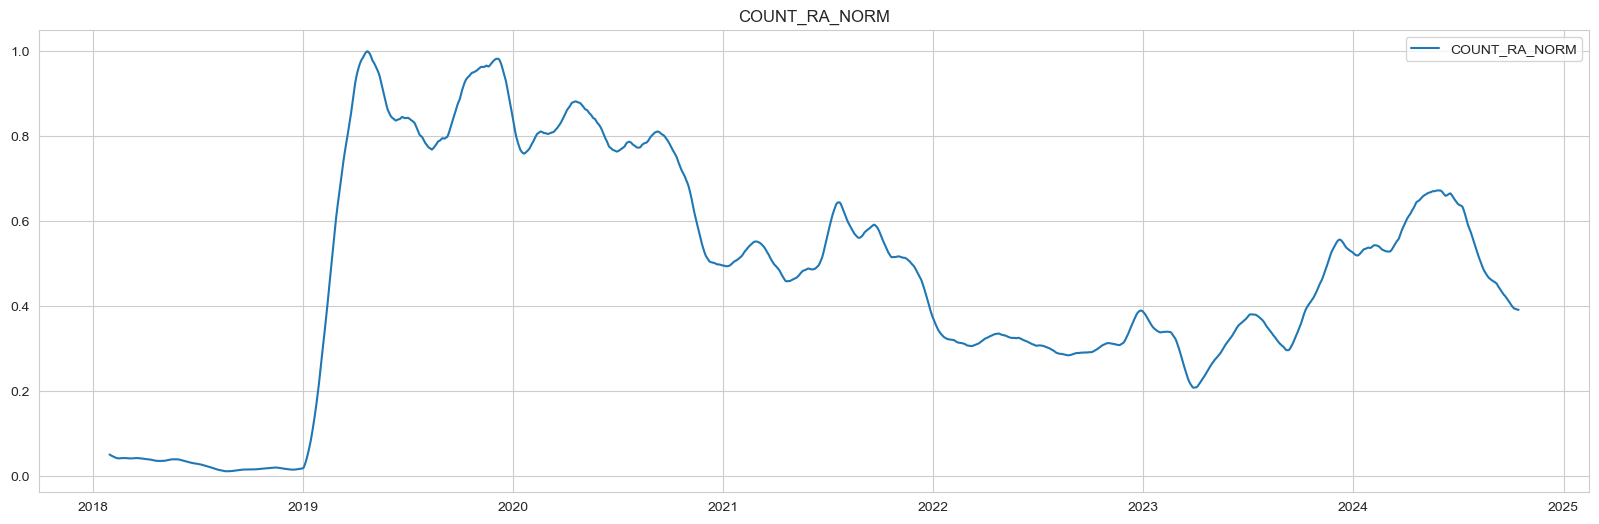

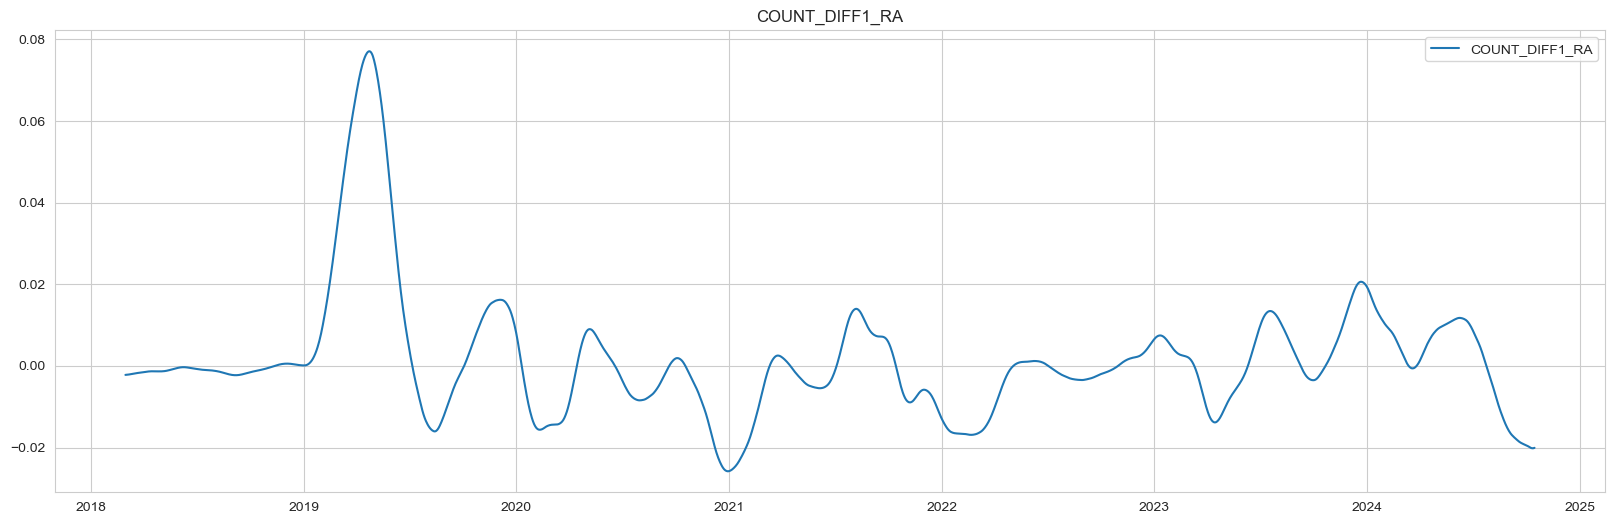

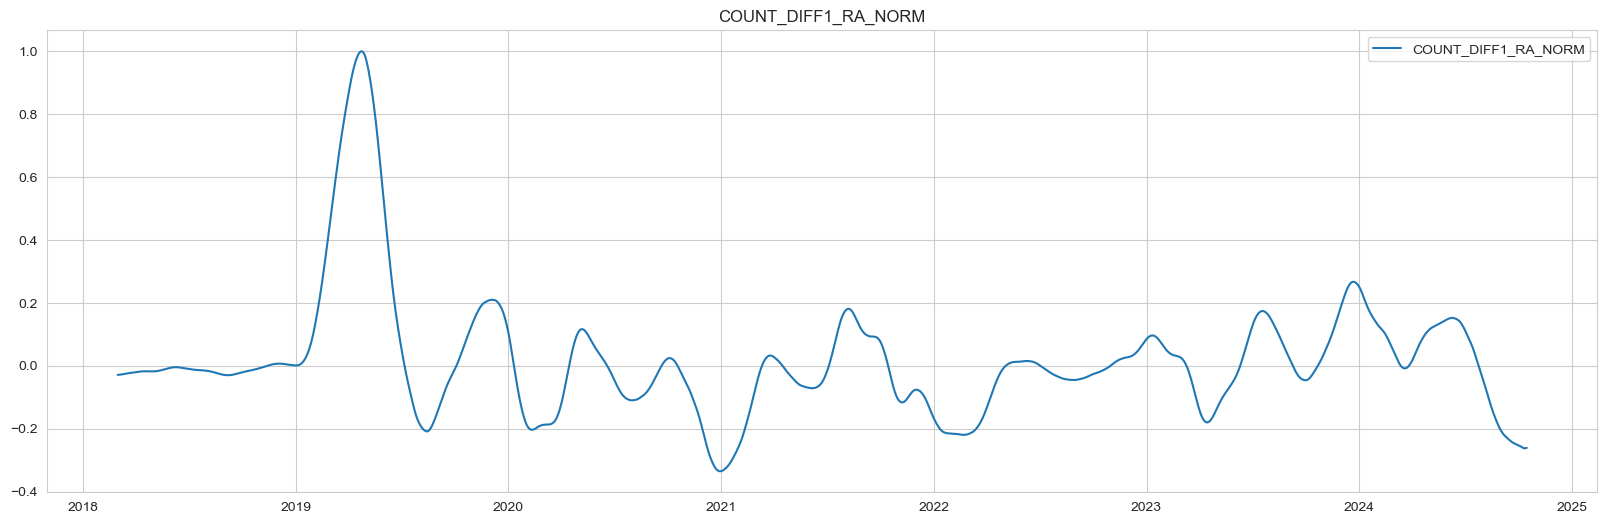

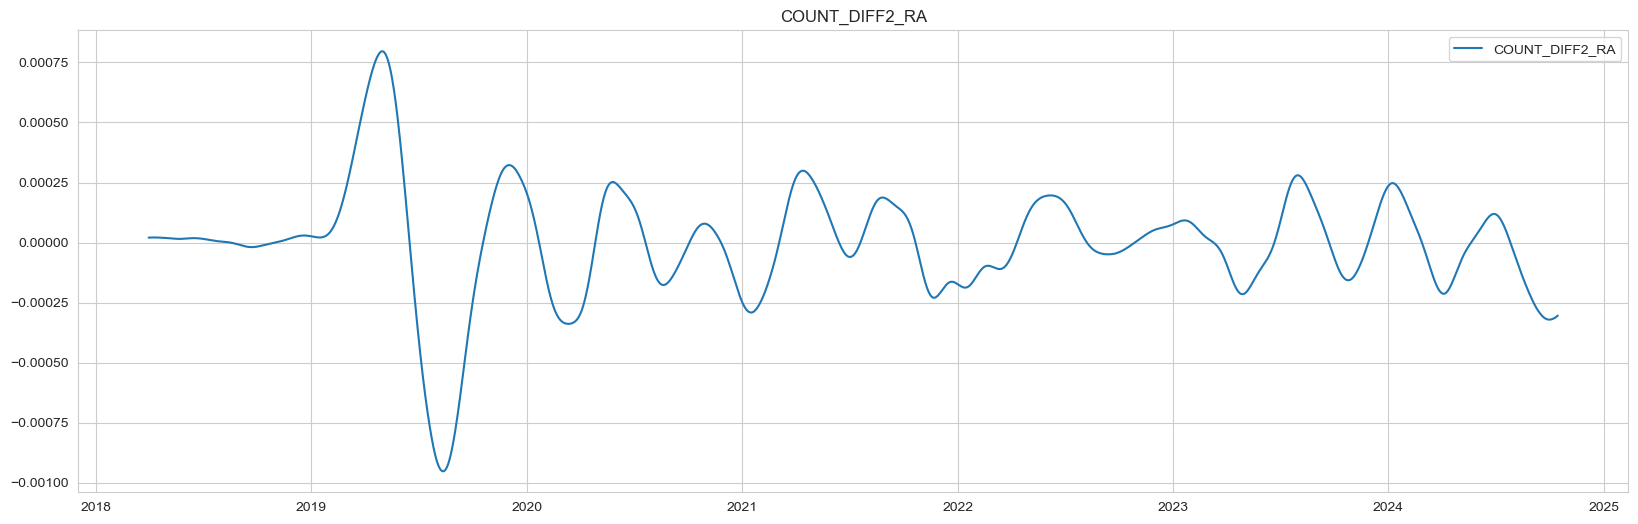

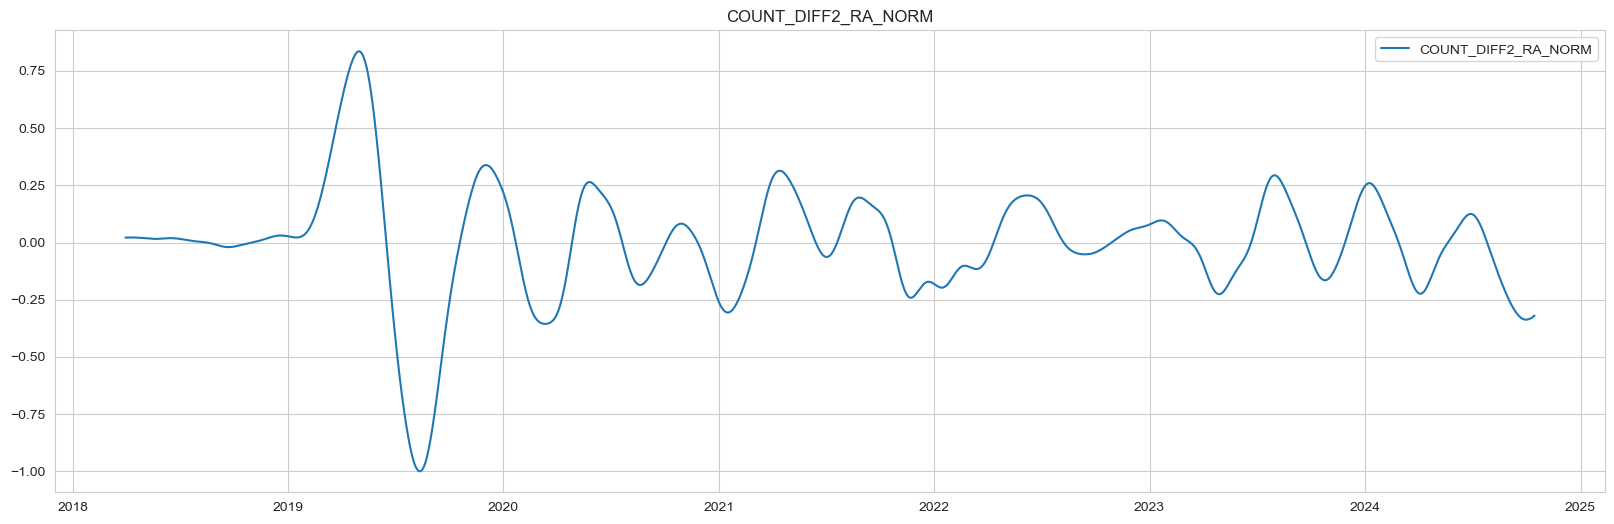

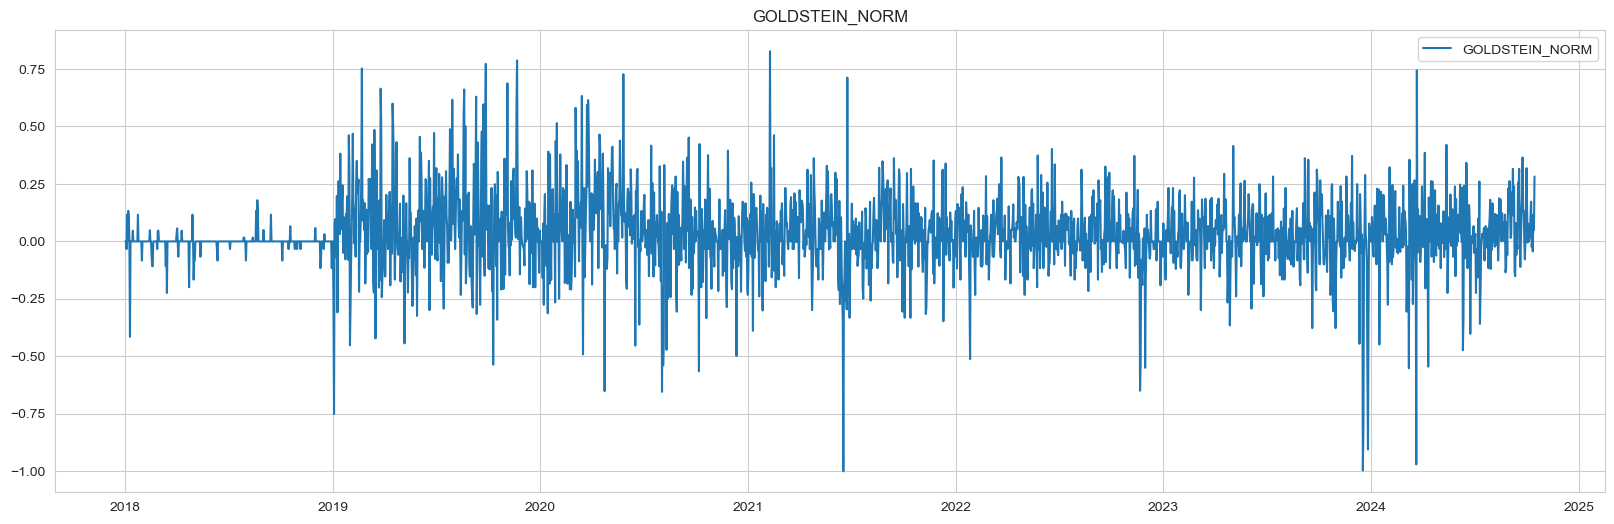

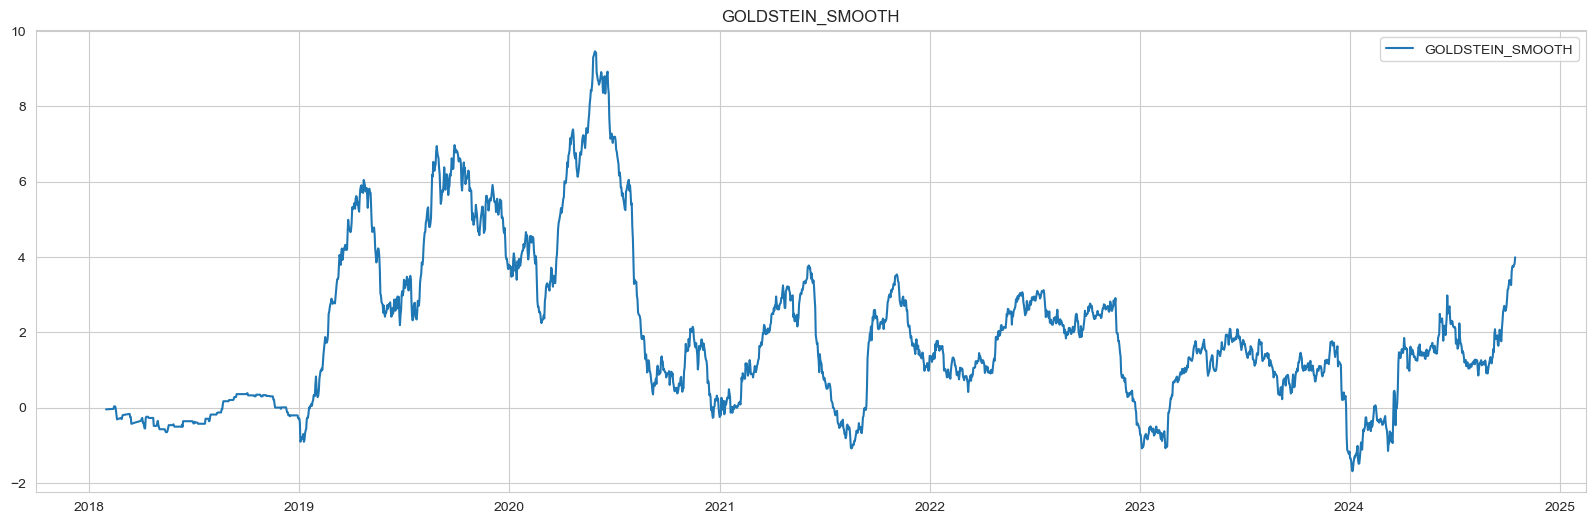

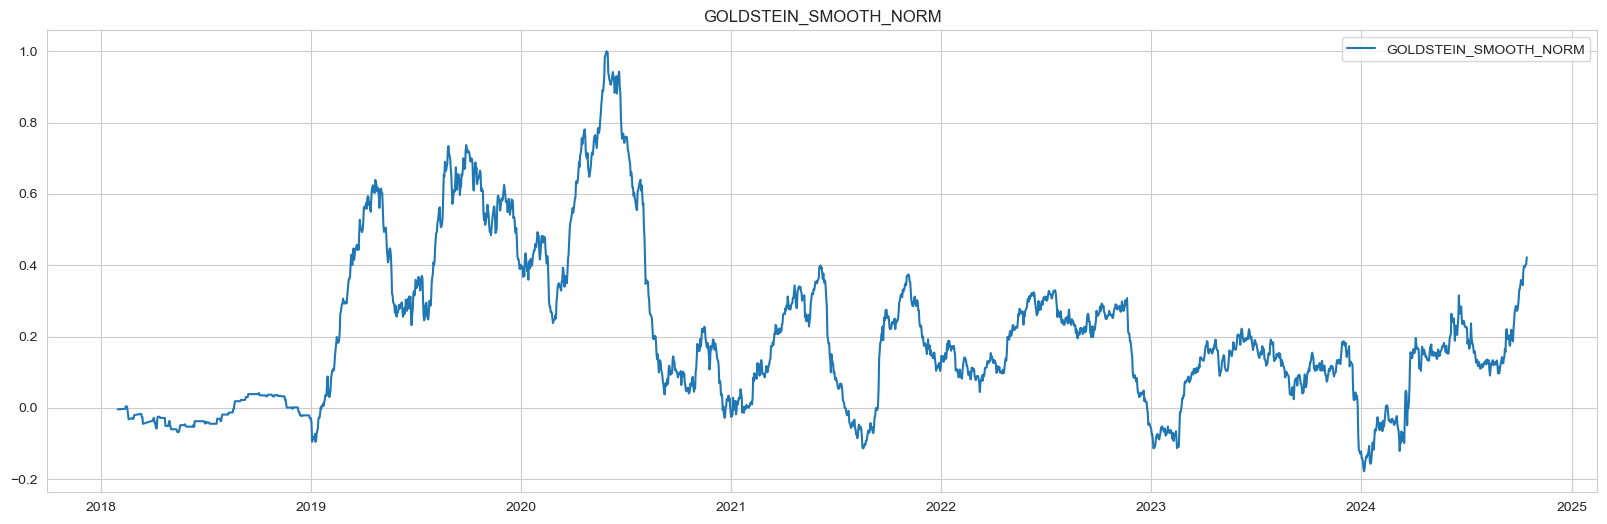

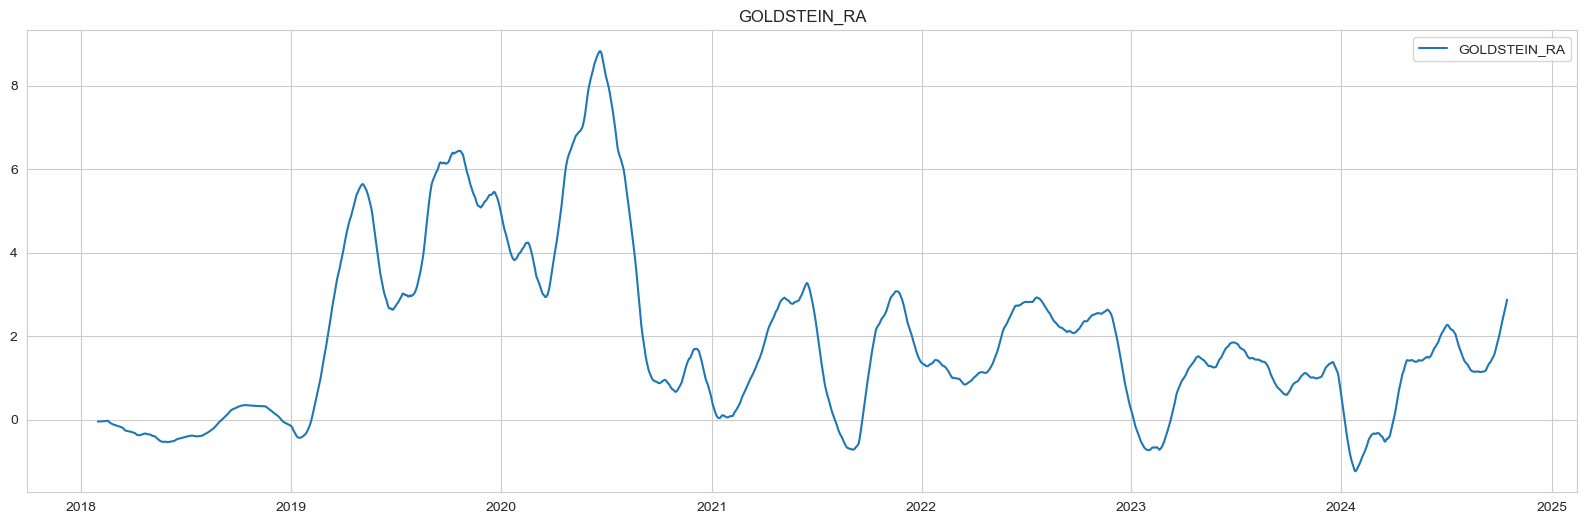

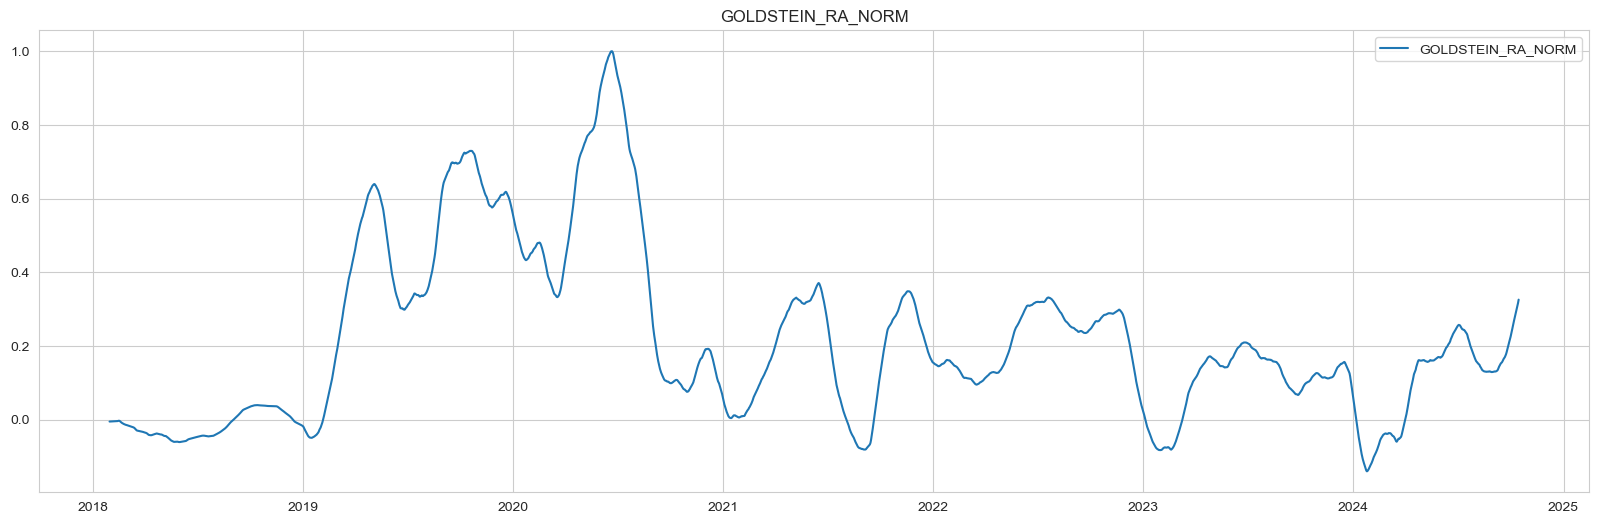

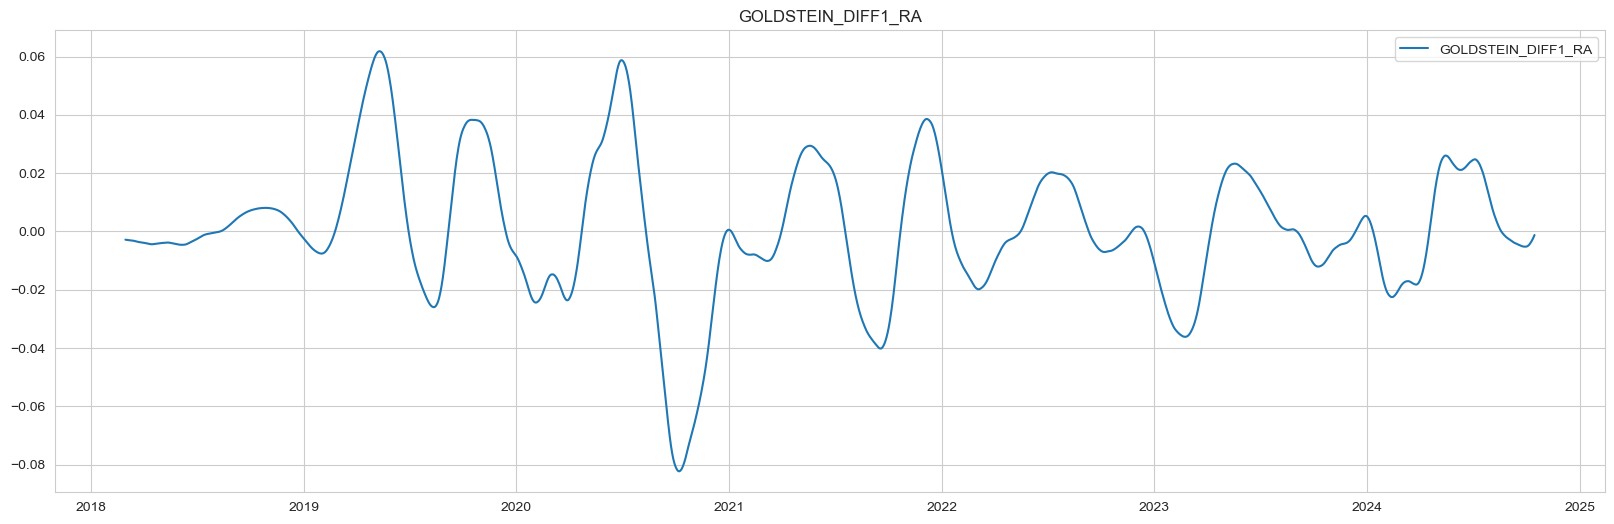

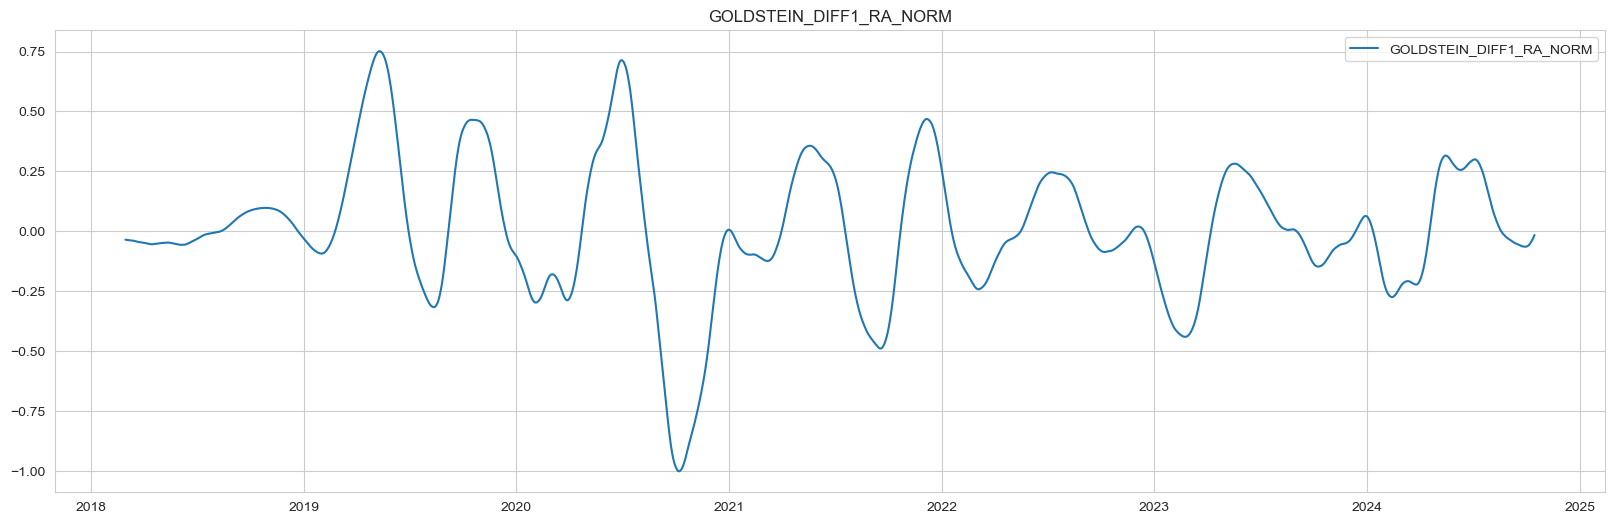

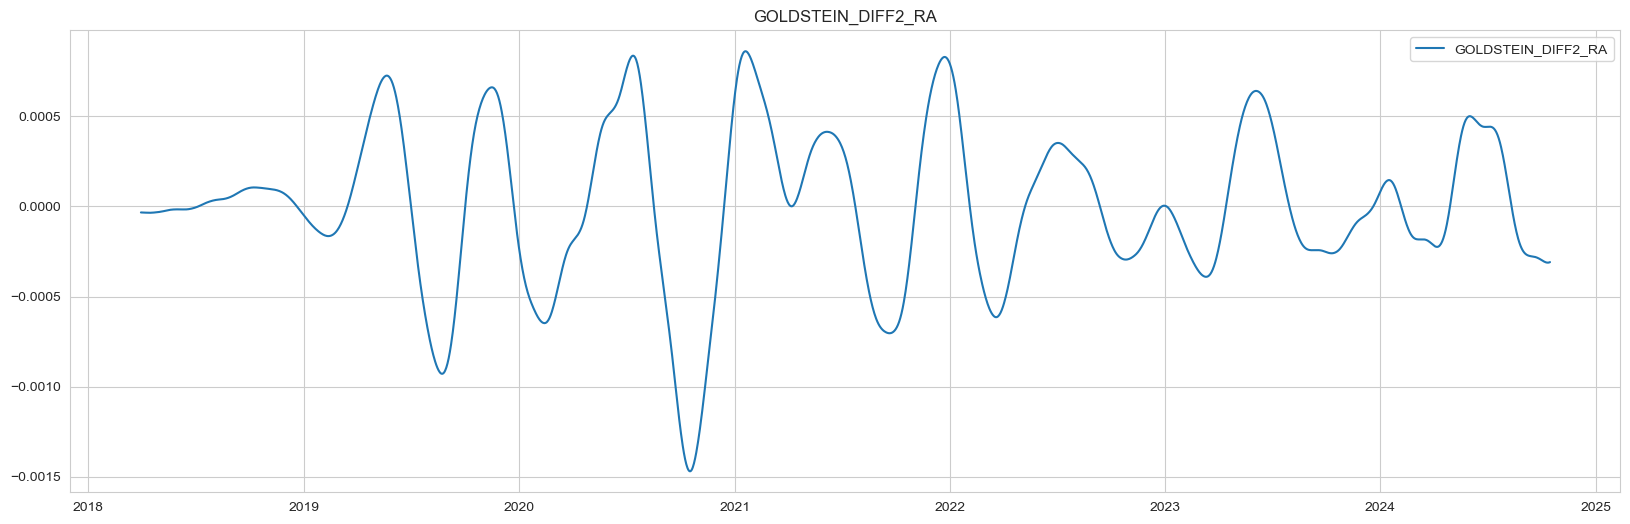

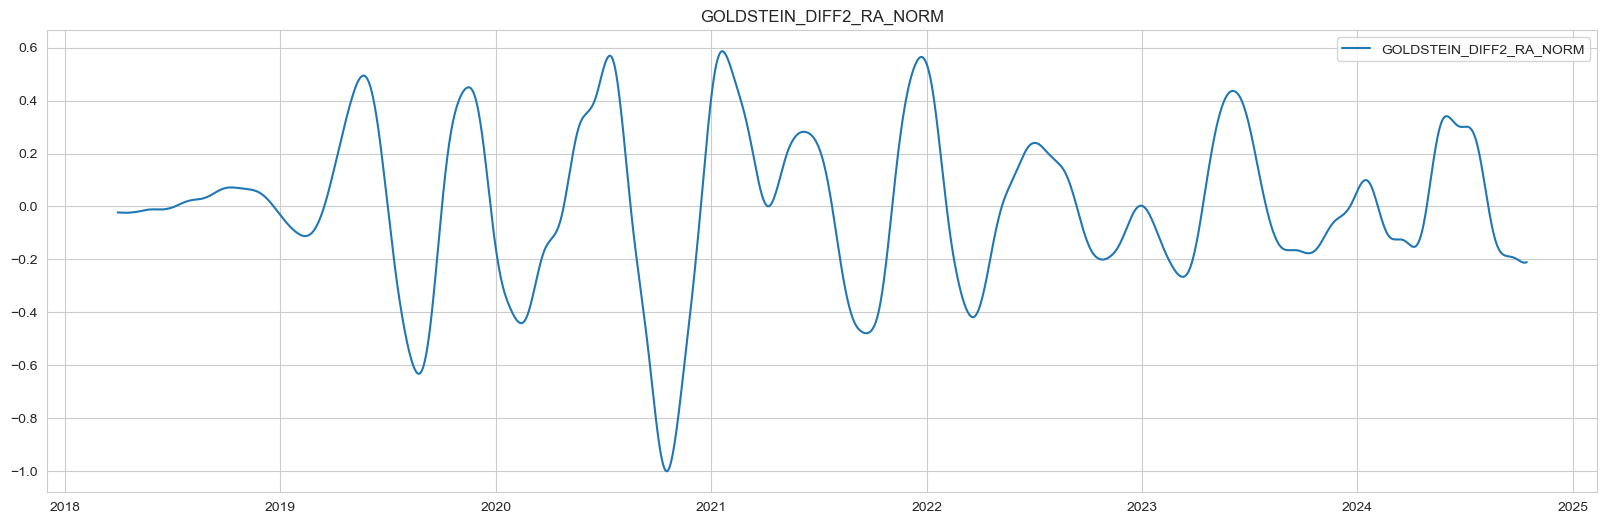

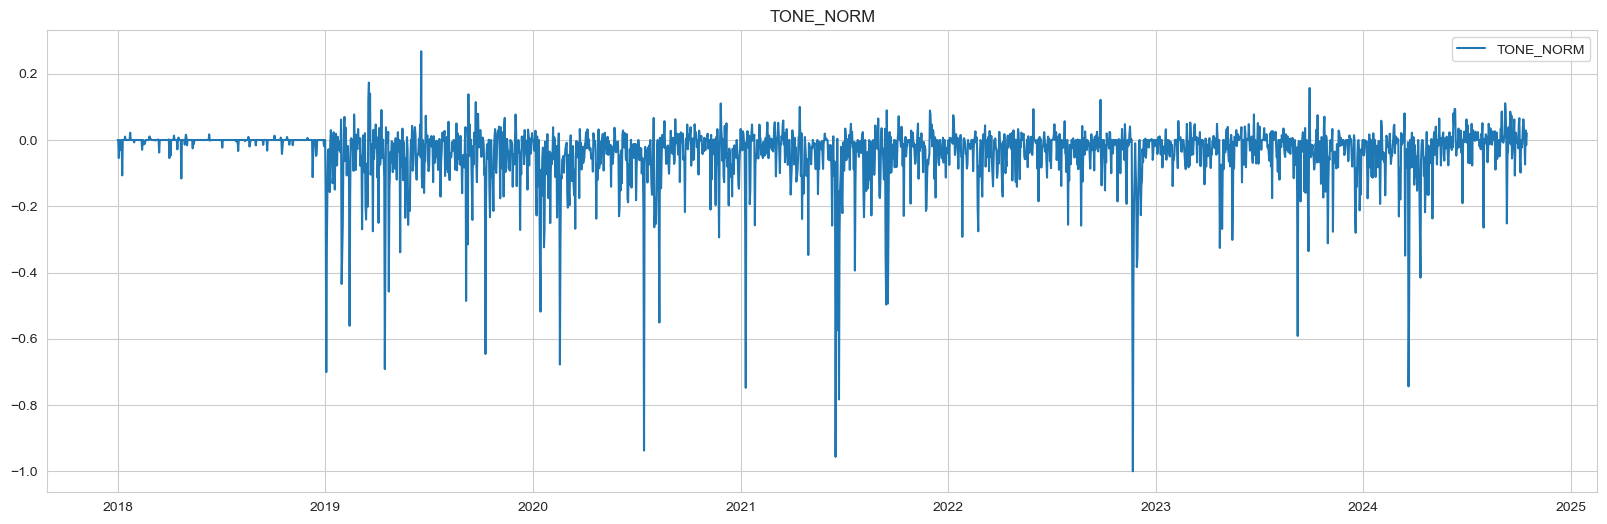

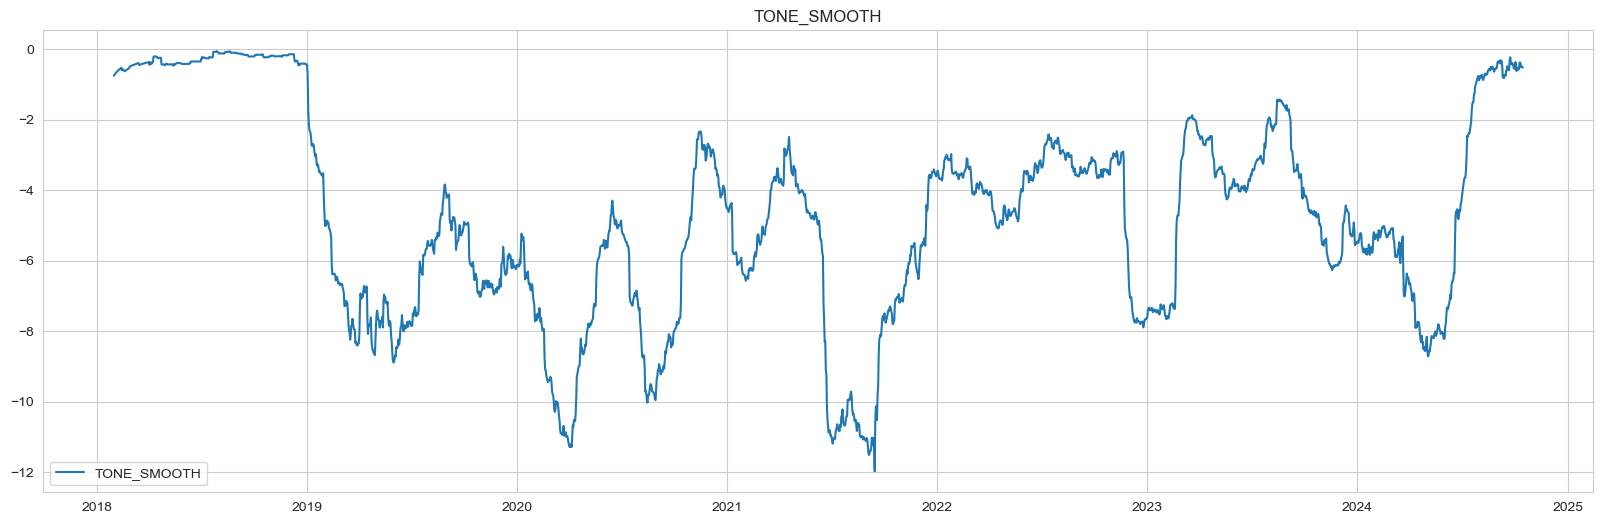

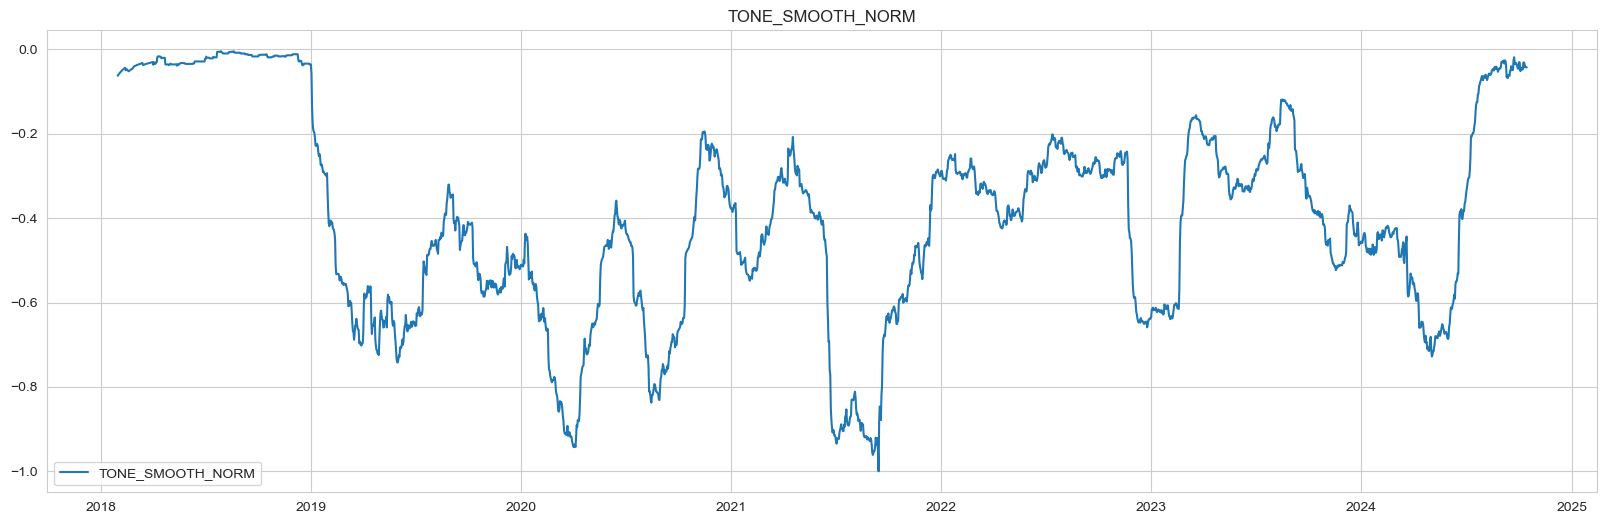

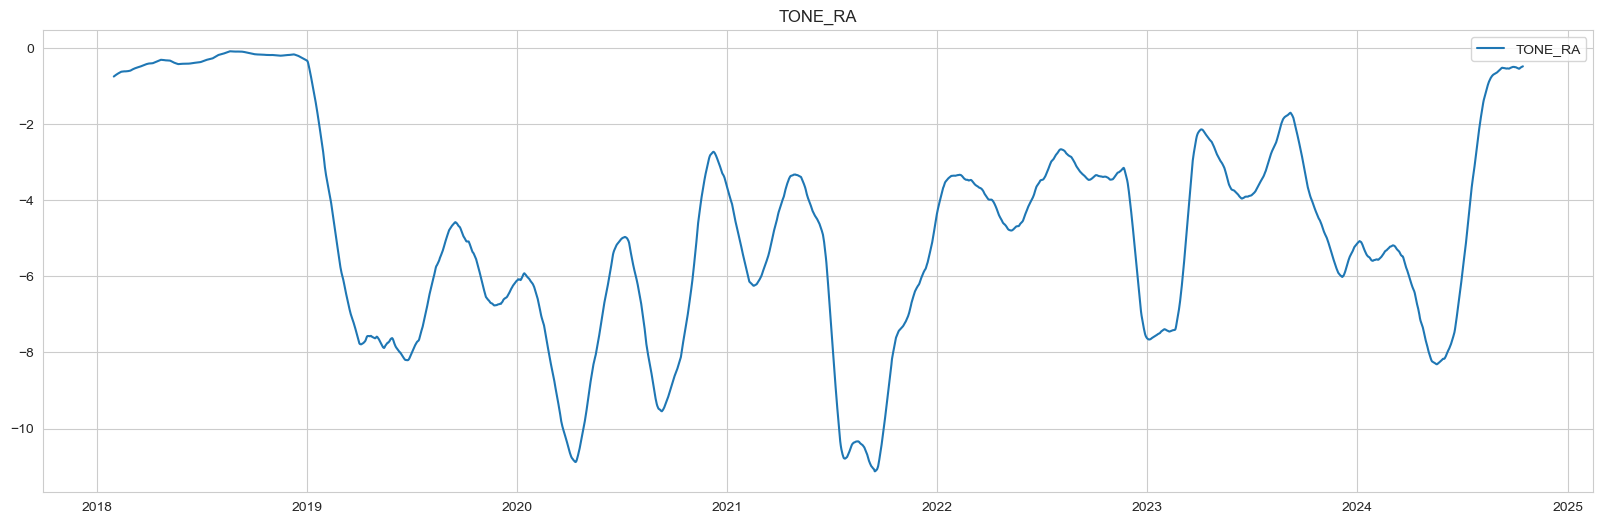

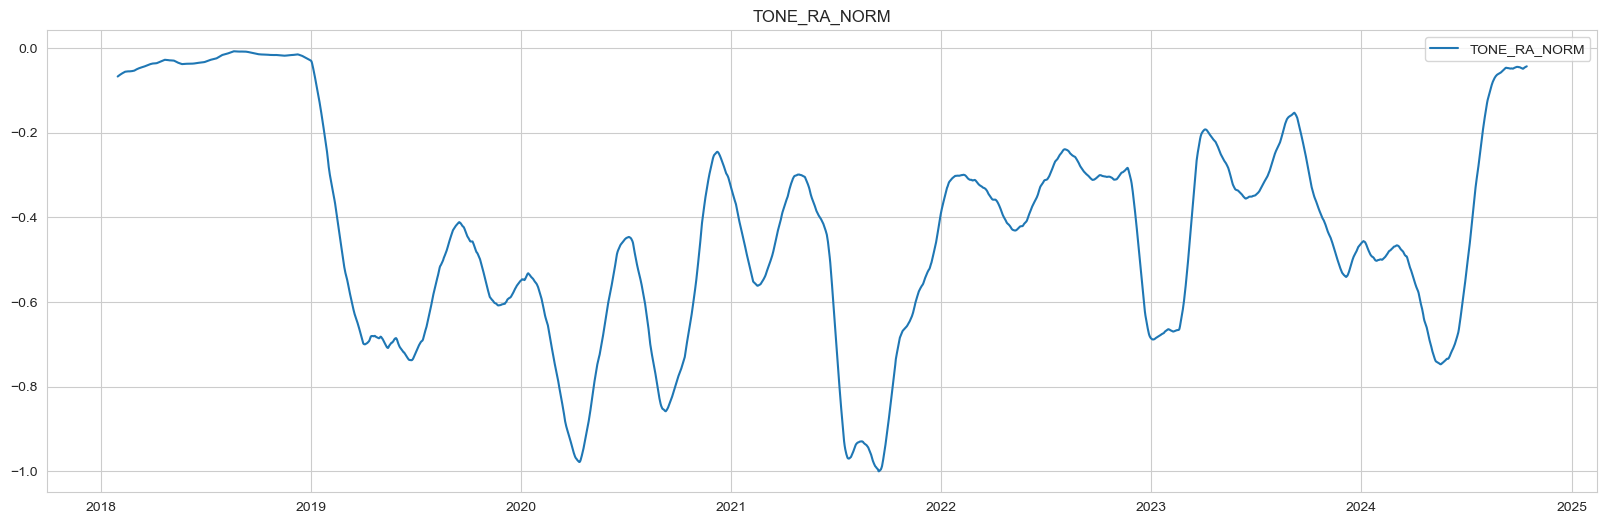

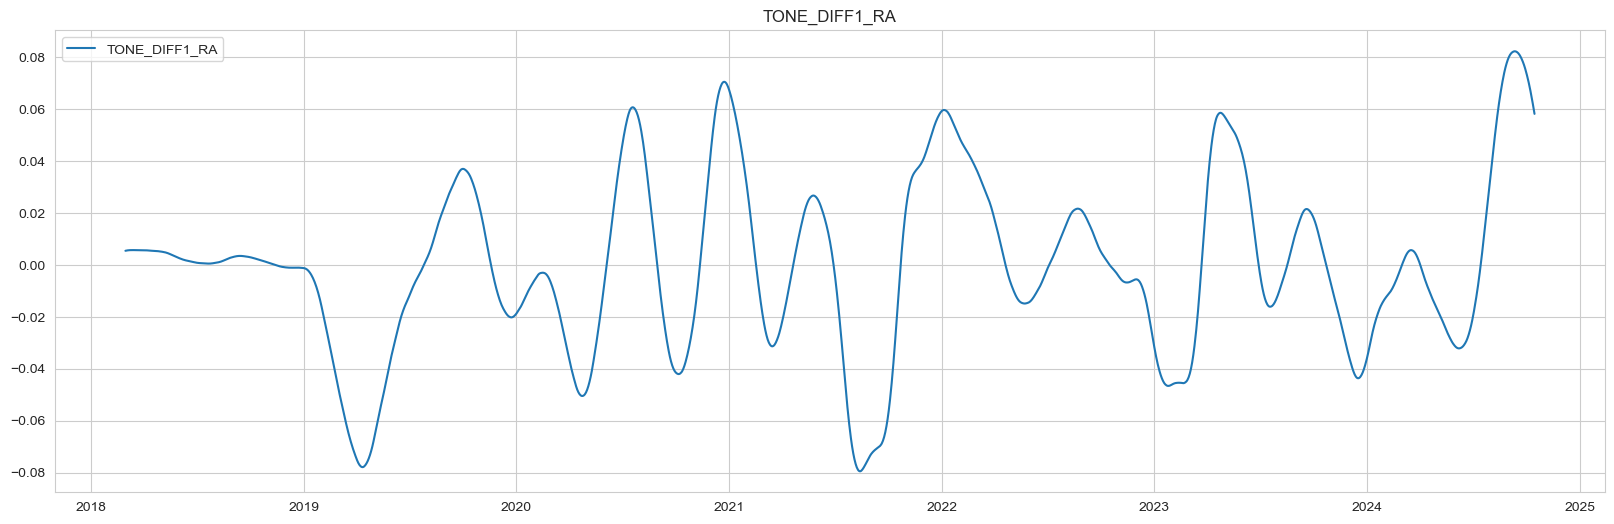

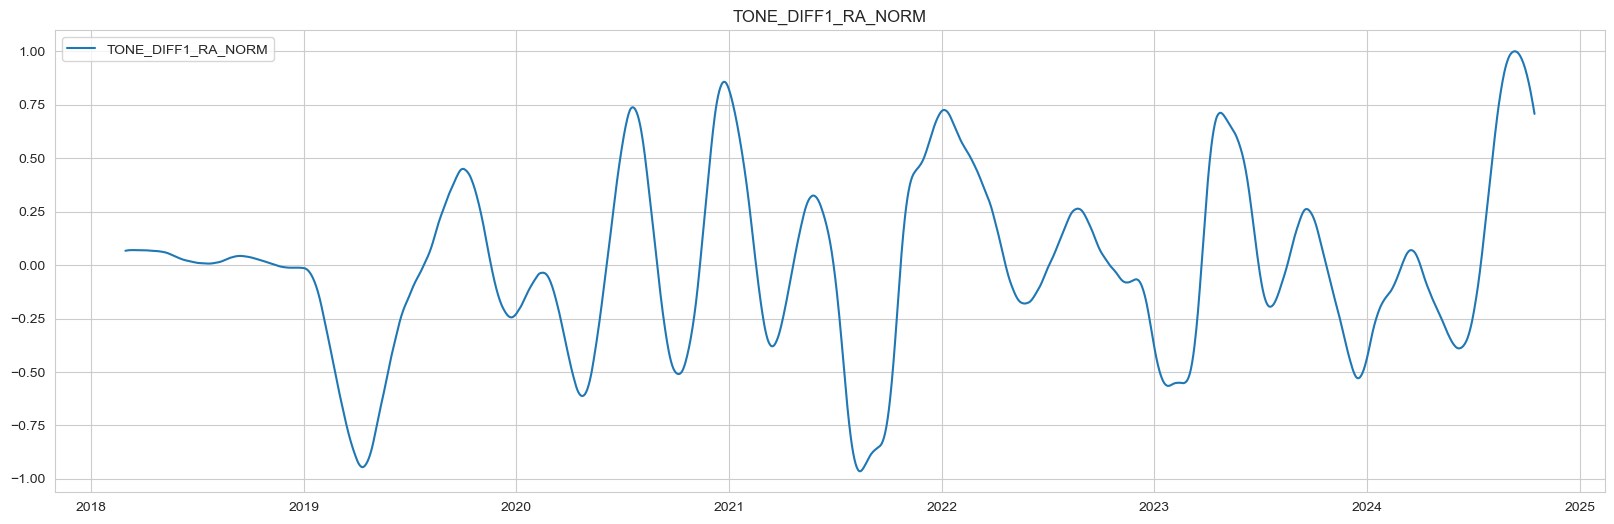

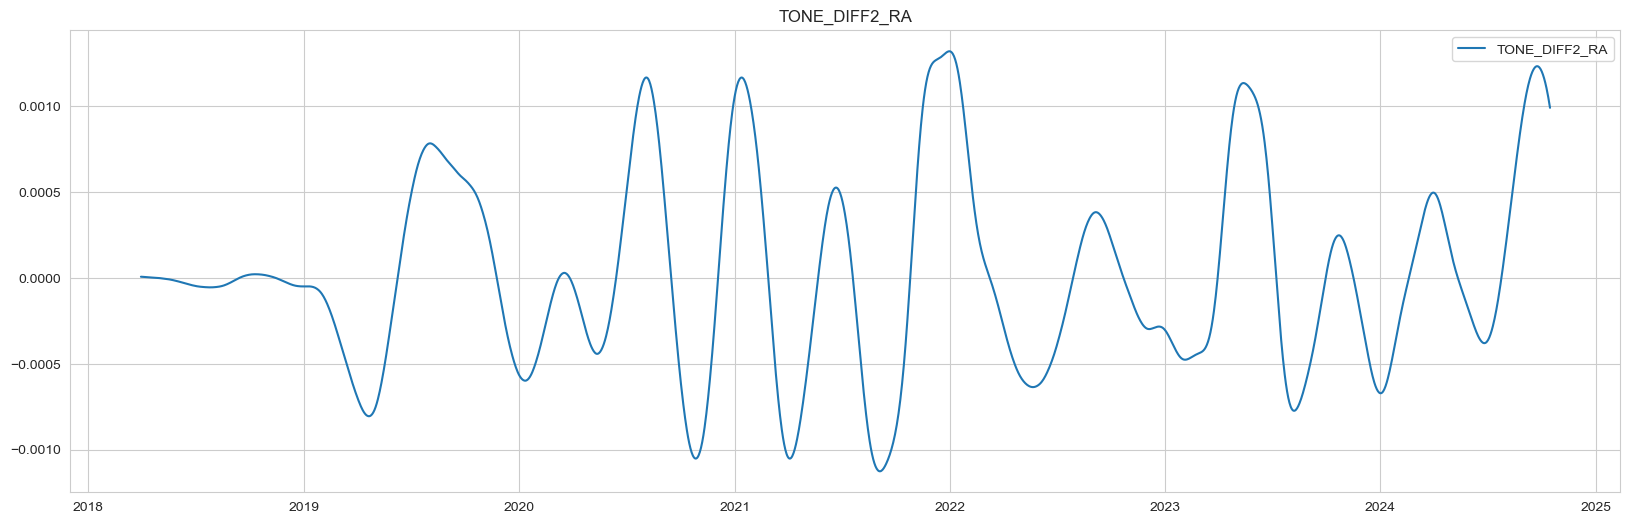

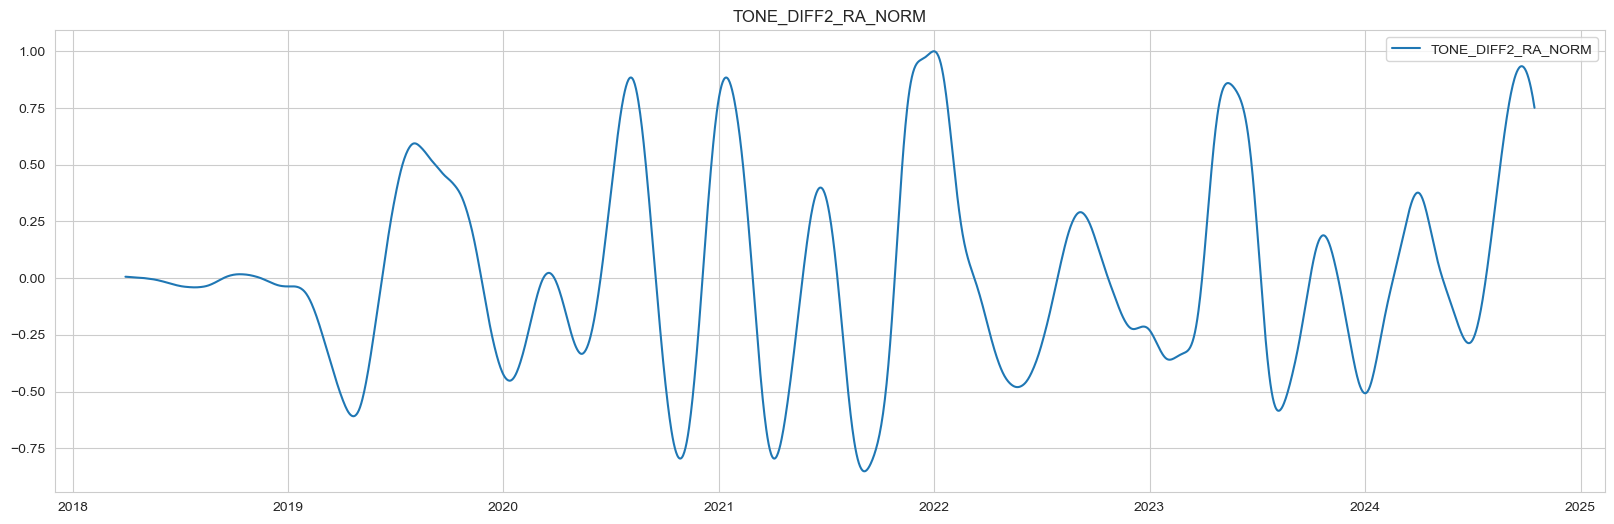

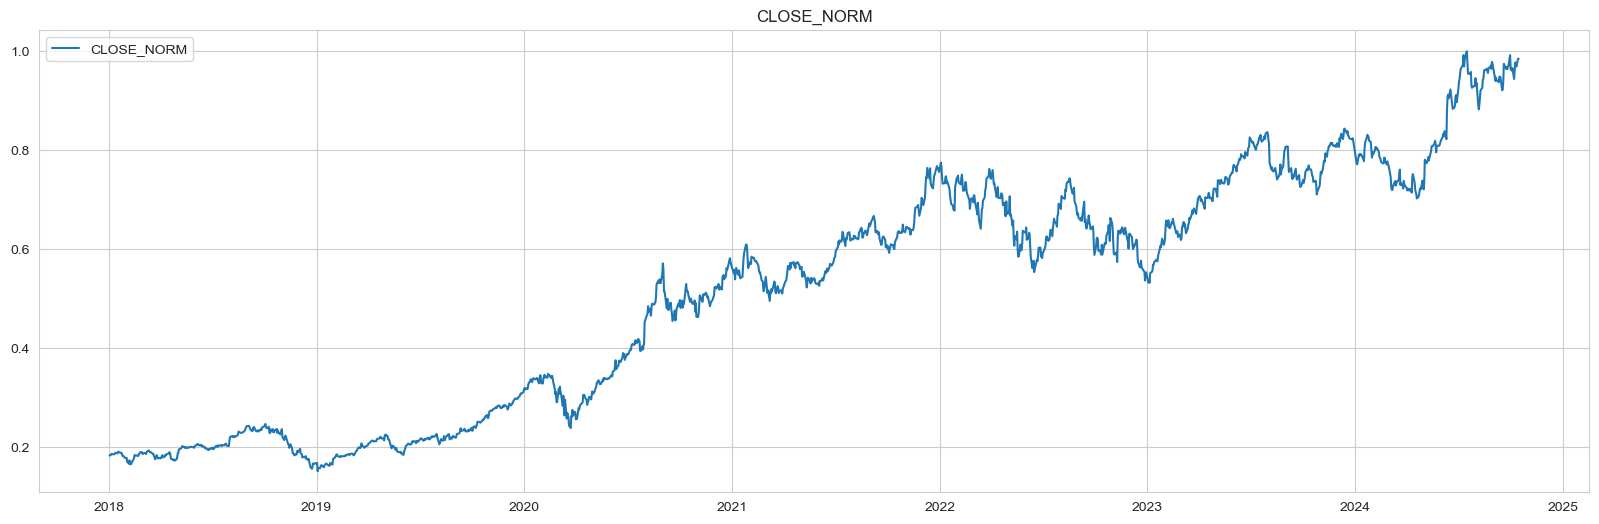

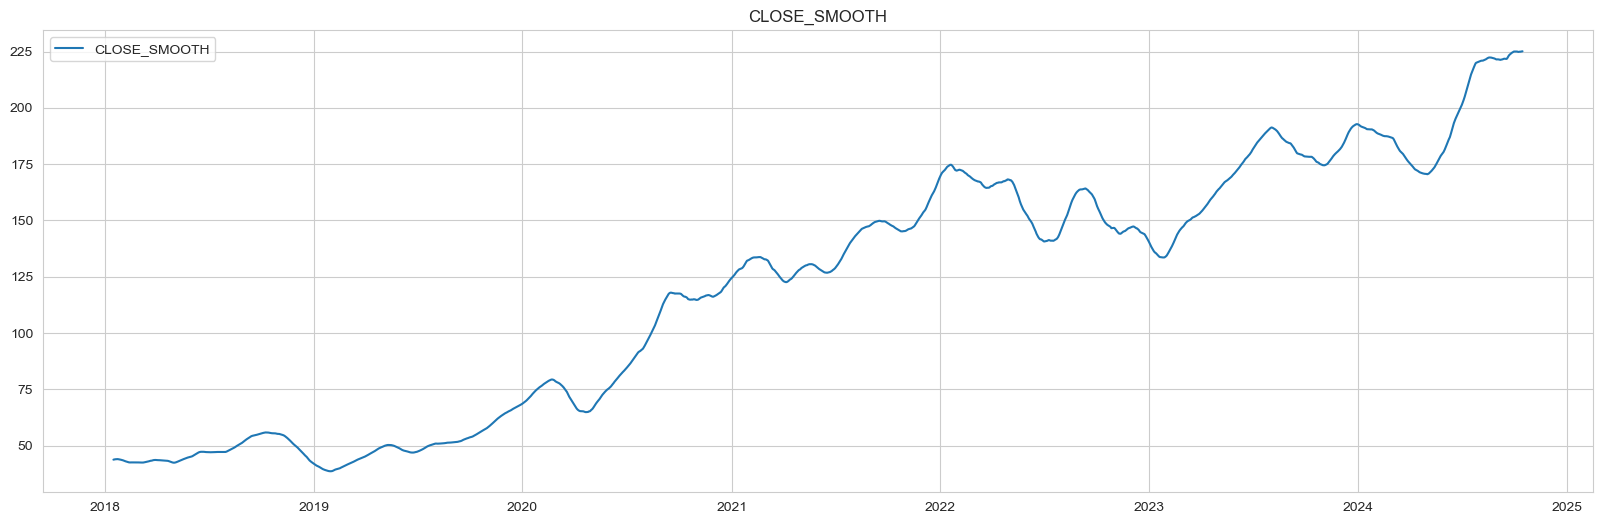

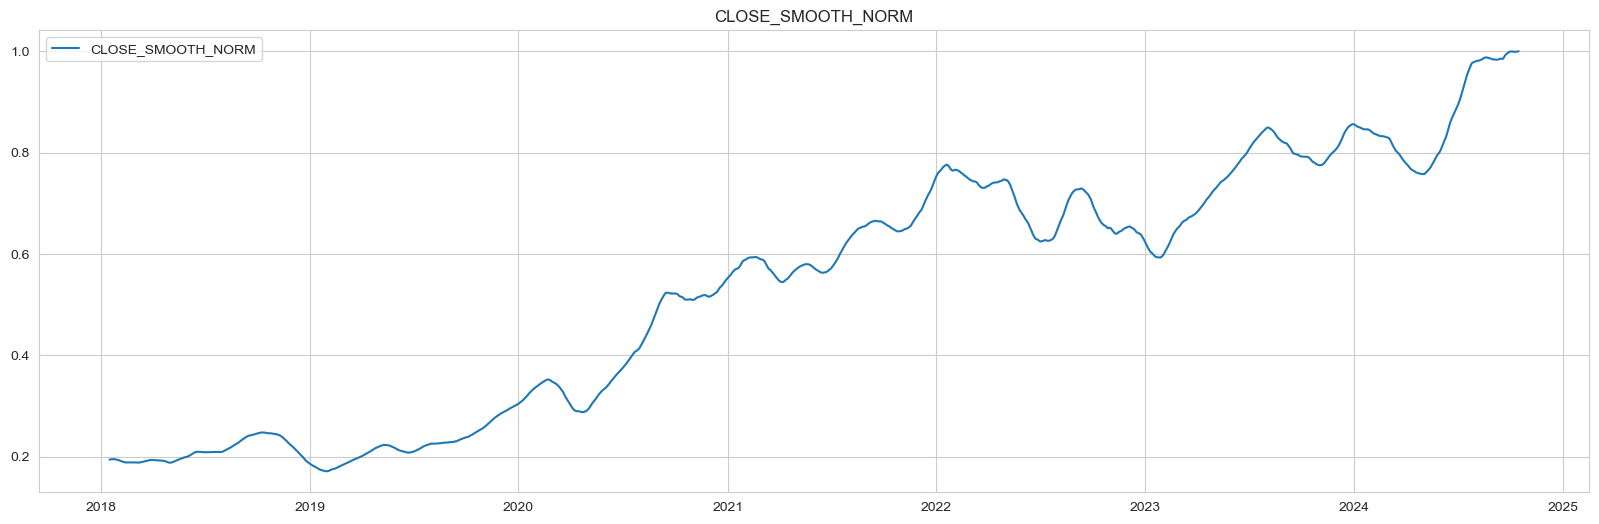

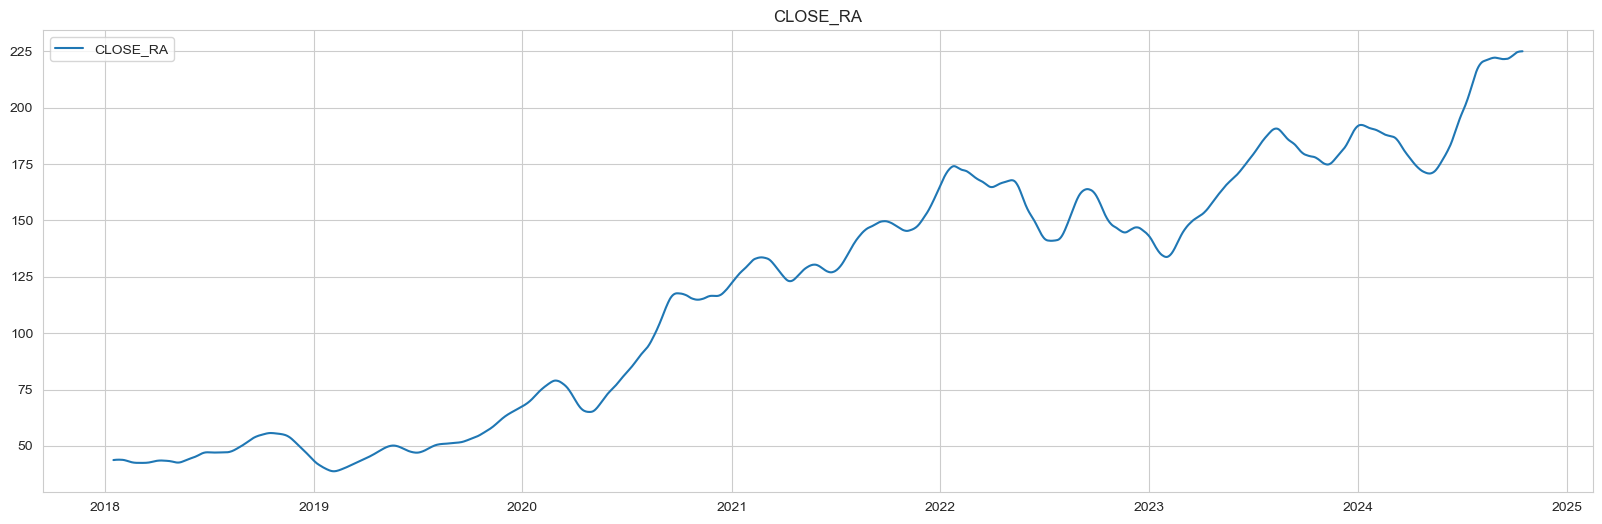

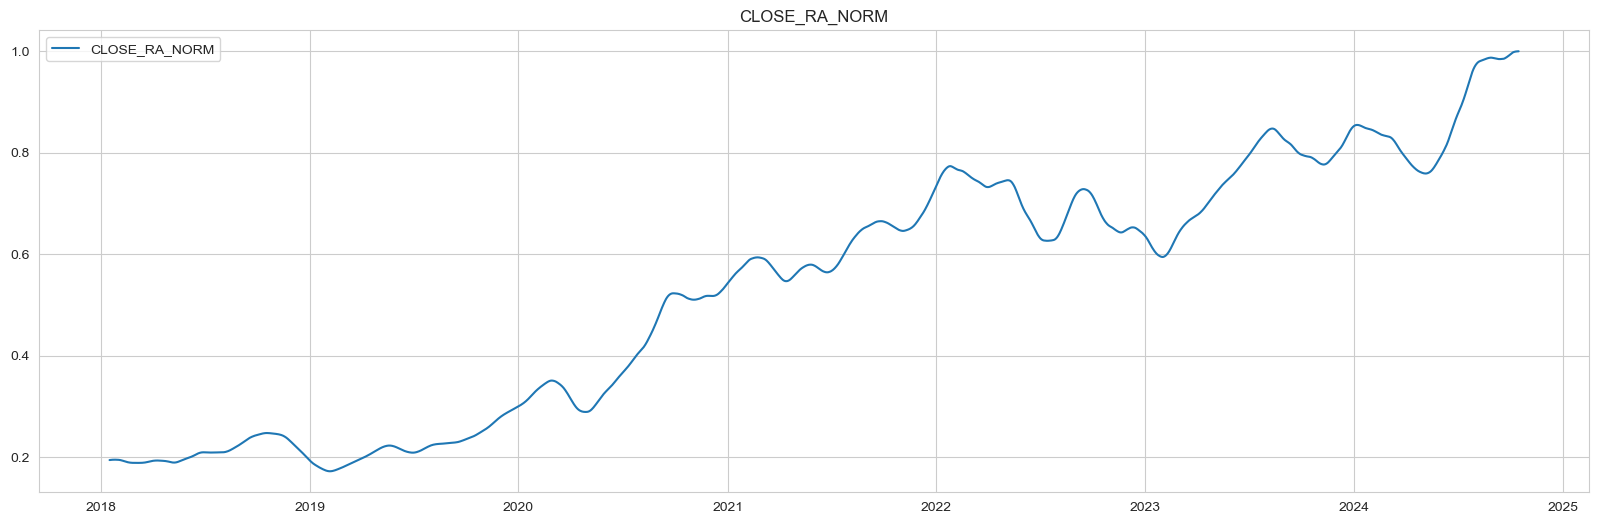

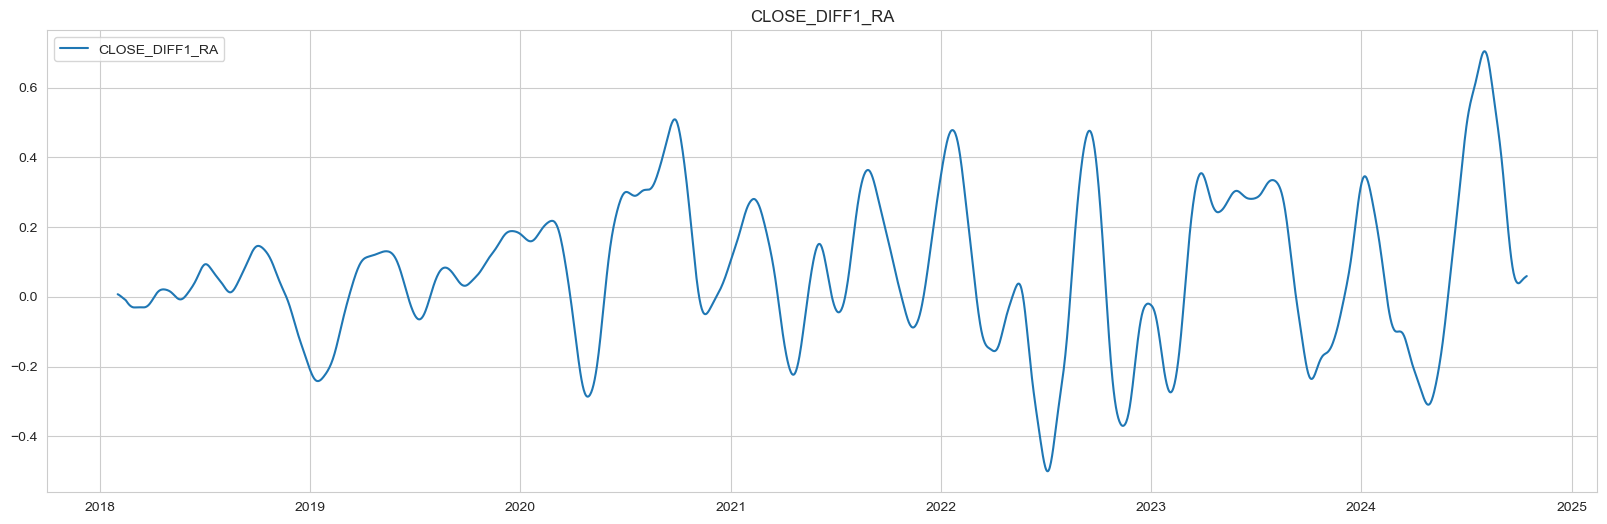

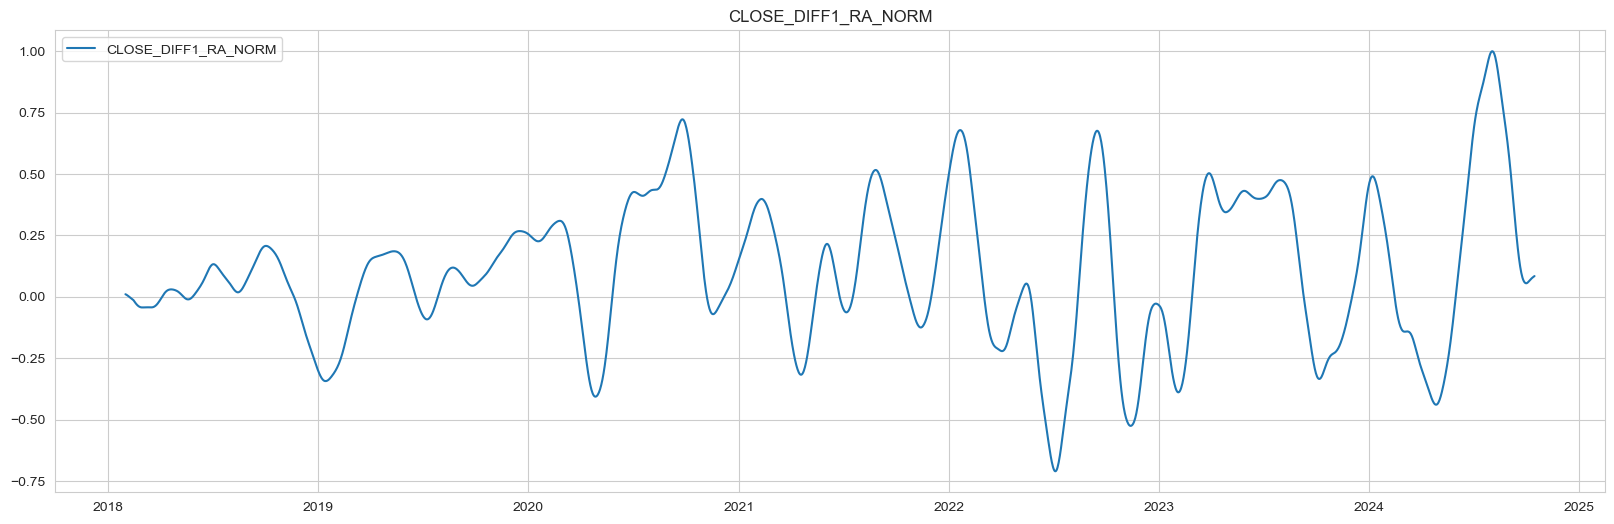

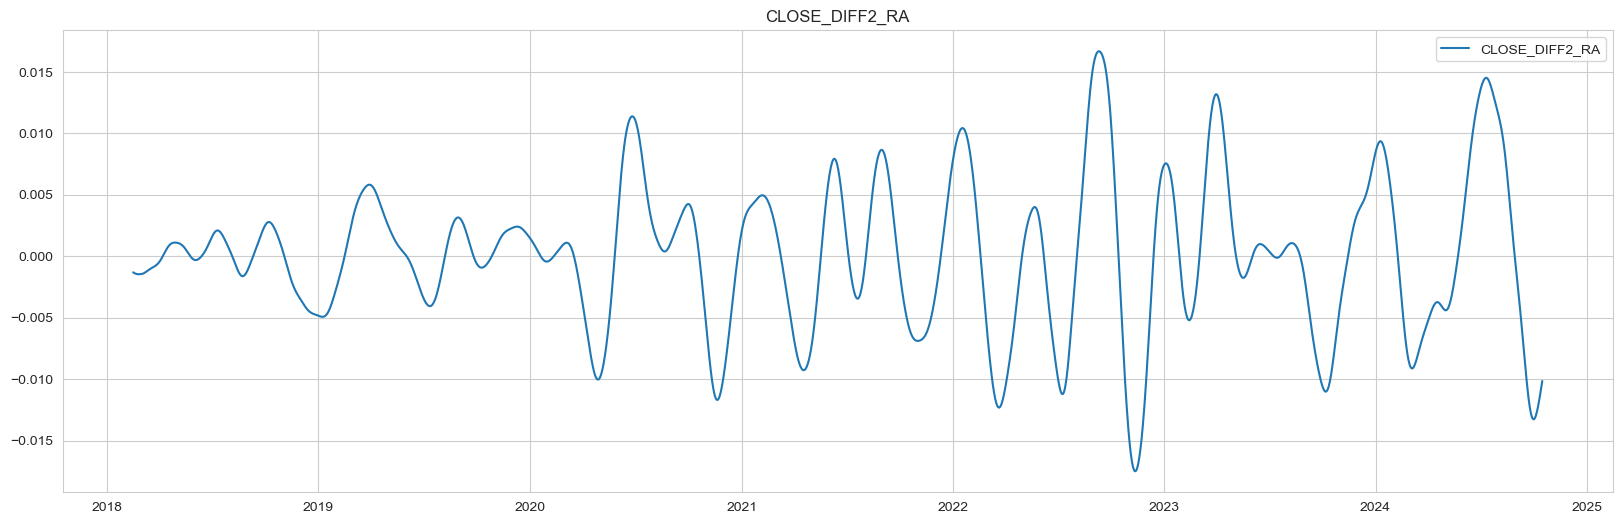

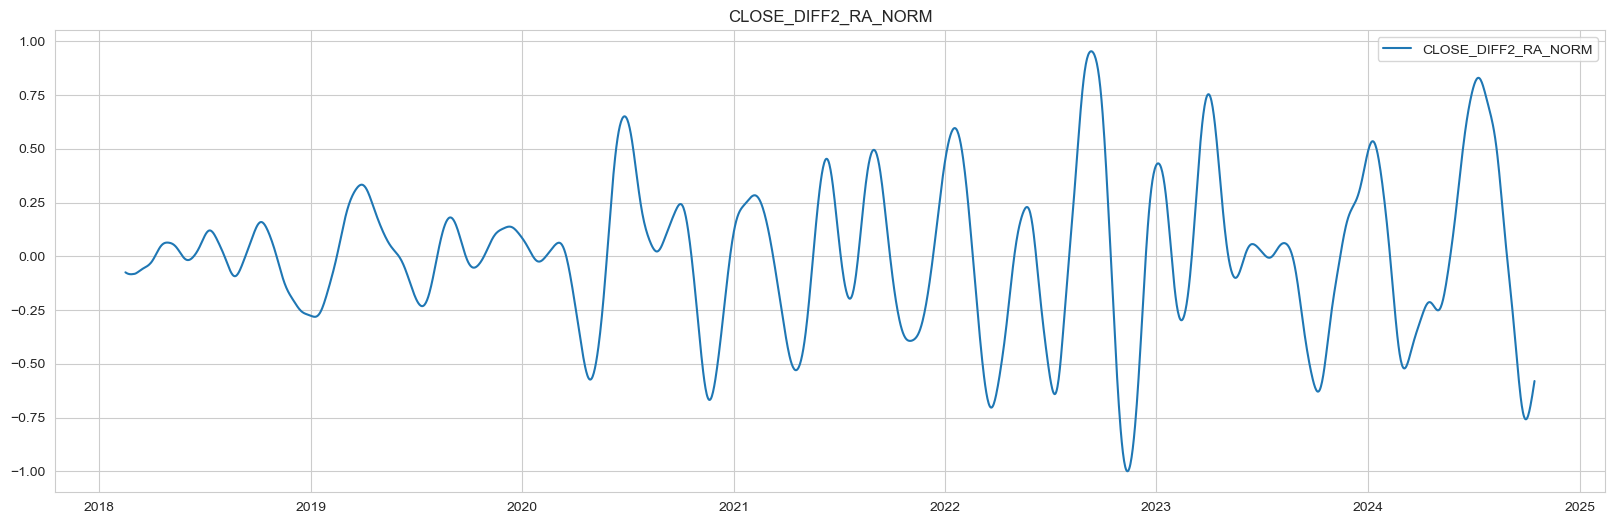

In [208]:
for folder in folders:
    
    folder_path_in = root_in + '/' + folder
    folder_path_out = root_out + '/' + folder
    input_source = [file for file in os.listdir(folder_path_in) if file.endswith('.csv')]
    
    print(folder)
    
    for file in input_source:
        
        stock_code = file.split('_')[0]
        company_name = file.split('_')[1].split('.')[0]
        print(f'Running: {stock_code}, {company_name.capitalize()}, {folder_path_out}')
        
        df = pd.read_csv(os.path.join(folder_path_in, file)) # article data
        df["Date"] = pd.to_datetime(df["Date"])
        df.set_index("Date", inplace=True)
        df.sort_values("Date")
        
        for col in df.columns:
            plt.figure(figsize=(20, 6))
            plt.title(f'{col}')
            plt.plot(df[col], label=f'{col}')
            plt.legend()
            plt.show()
        break
    print()
    break
    

In [209]:
for col in df.columns:
    if 'NORM' not in col.upper() :
        df.drop(col, axis=1, inplace=True)

In [210]:
df.columns

Index(['COUNT_NORM', 'COUNT_SMOOTH_NORM', 'COUNT_RA_NORM',
       'COUNT_DIFF1_RA_NORM', 'COUNT_DIFF2_RA_NORM', 'GOLDSTEIN_NORM',
       'GOLDSTEIN_SMOOTH_NORM', 'GOLDSTEIN_RA_NORM', 'GOLDSTEIN_DIFF1_RA_NORM',
       'GOLDSTEIN_DIFF2_RA_NORM', 'TONE_NORM', 'TONE_SMOOTH_NORM',
       'TONE_RA_NORM', 'TONE_DIFF1_RA_NORM', 'TONE_DIFF2_RA_NORM',
       'CLOSE_NORM', 'CLOSE_SMOOTH_NORM', 'CLOSE_RA_NORM',
       'CLOSE_DIFF1_RA_NORM', 'CLOSE_DIFF2_RA_NORM'],
      dtype='object')

In [211]:
grouped_columns = {}
for col in df.columns:
    key = "_".join(col.split("_")[1:])
    if key not in grouped_columns:
        grouped_columns[key] = []
    grouped_columns[key].append(col)

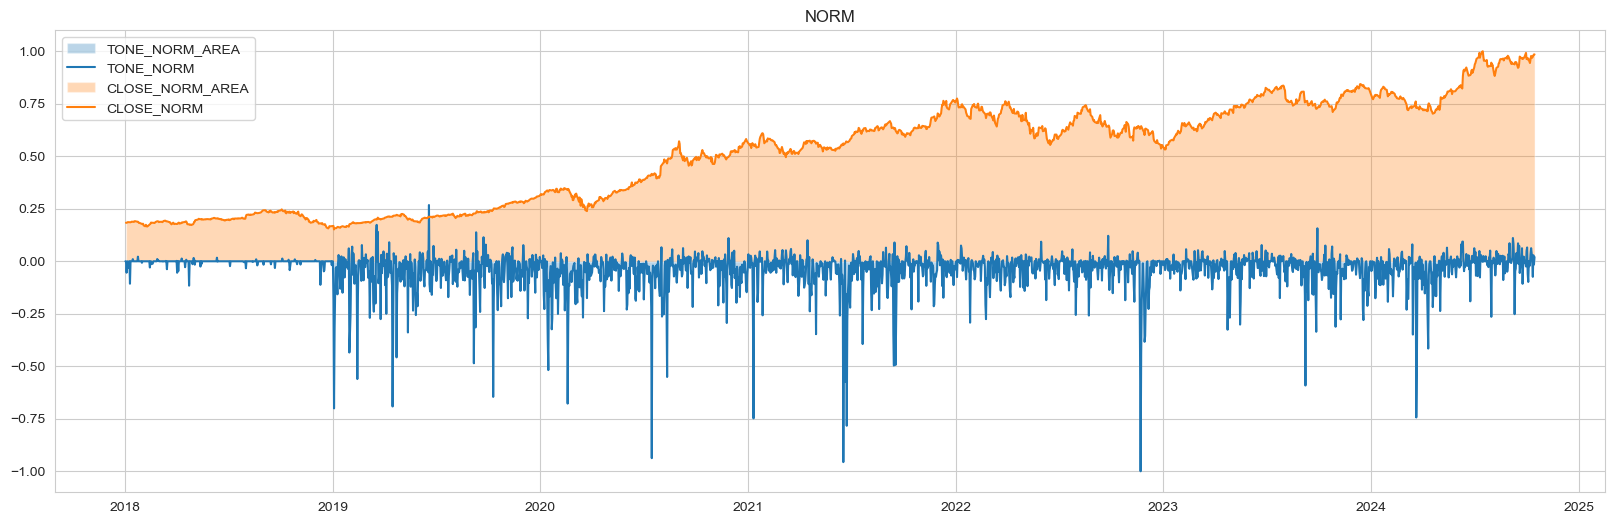

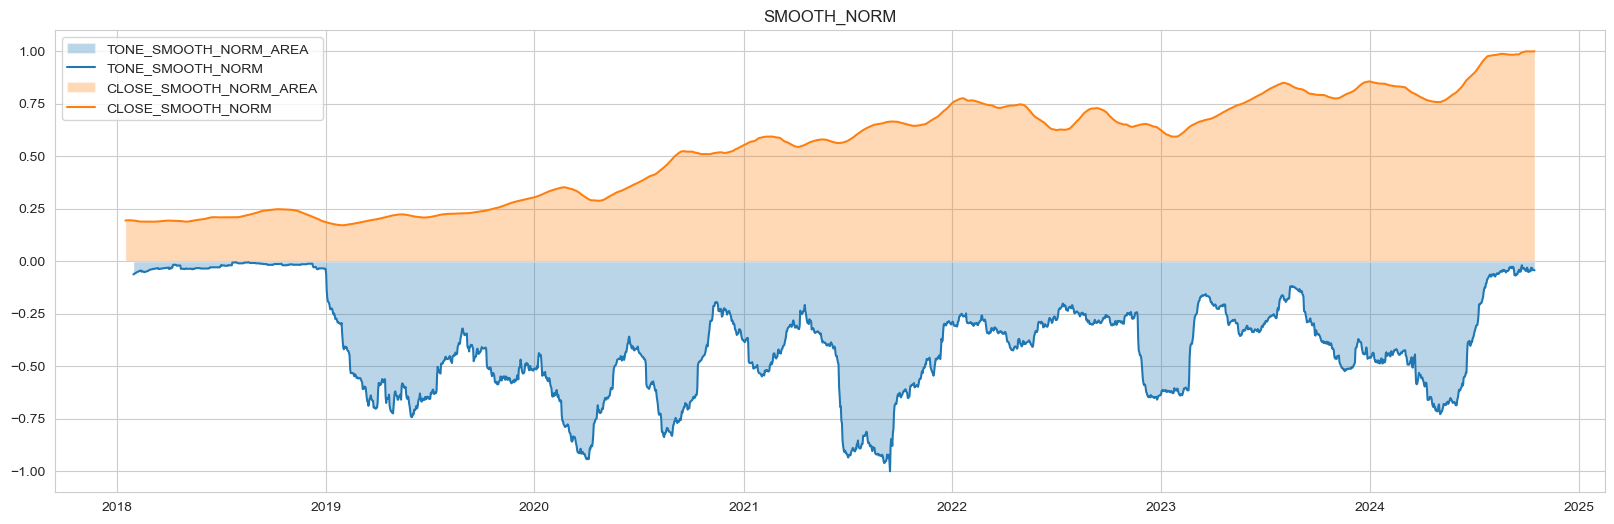

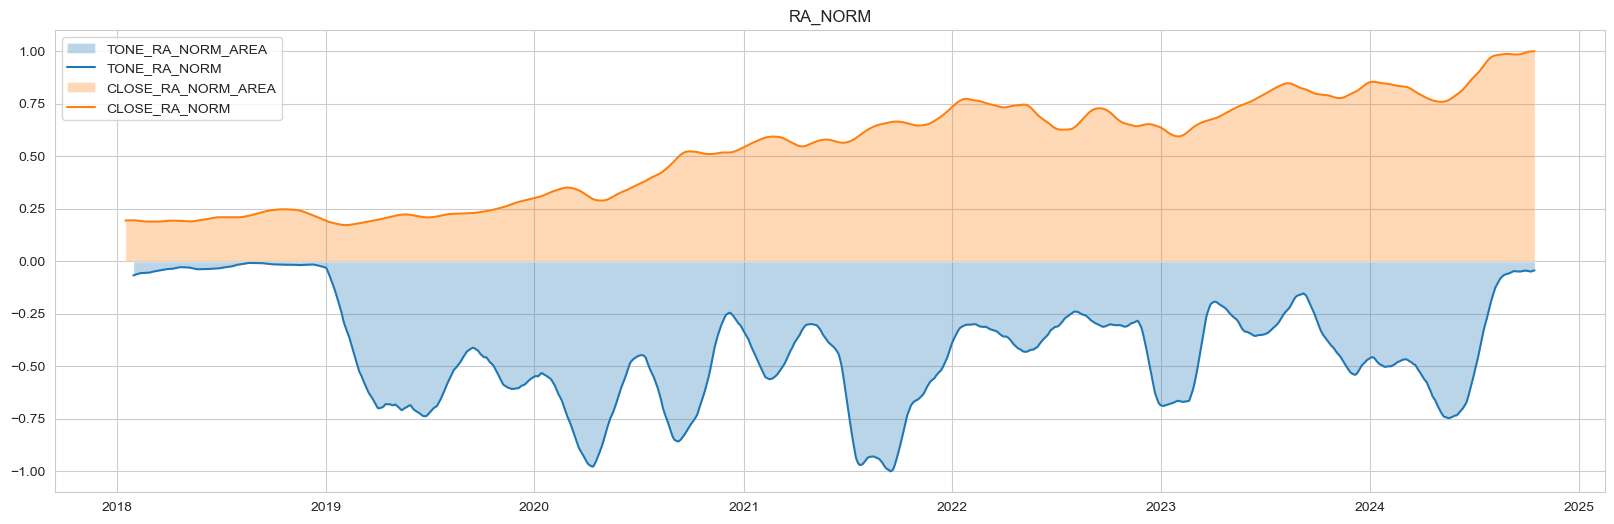

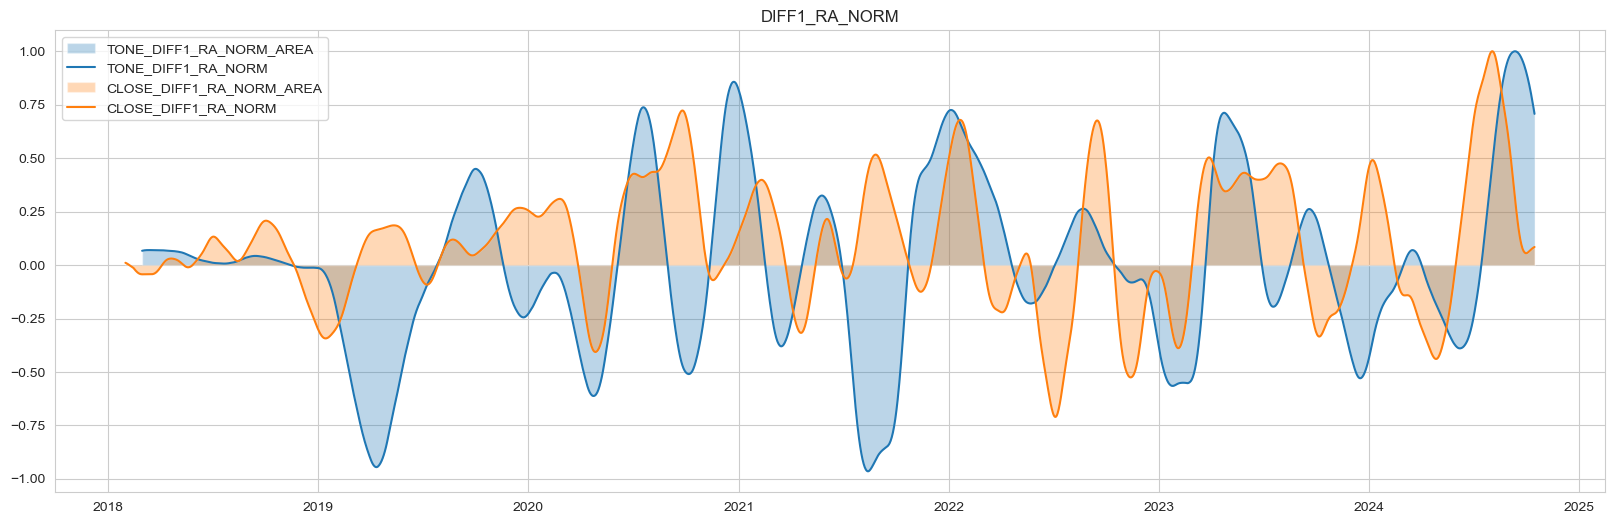

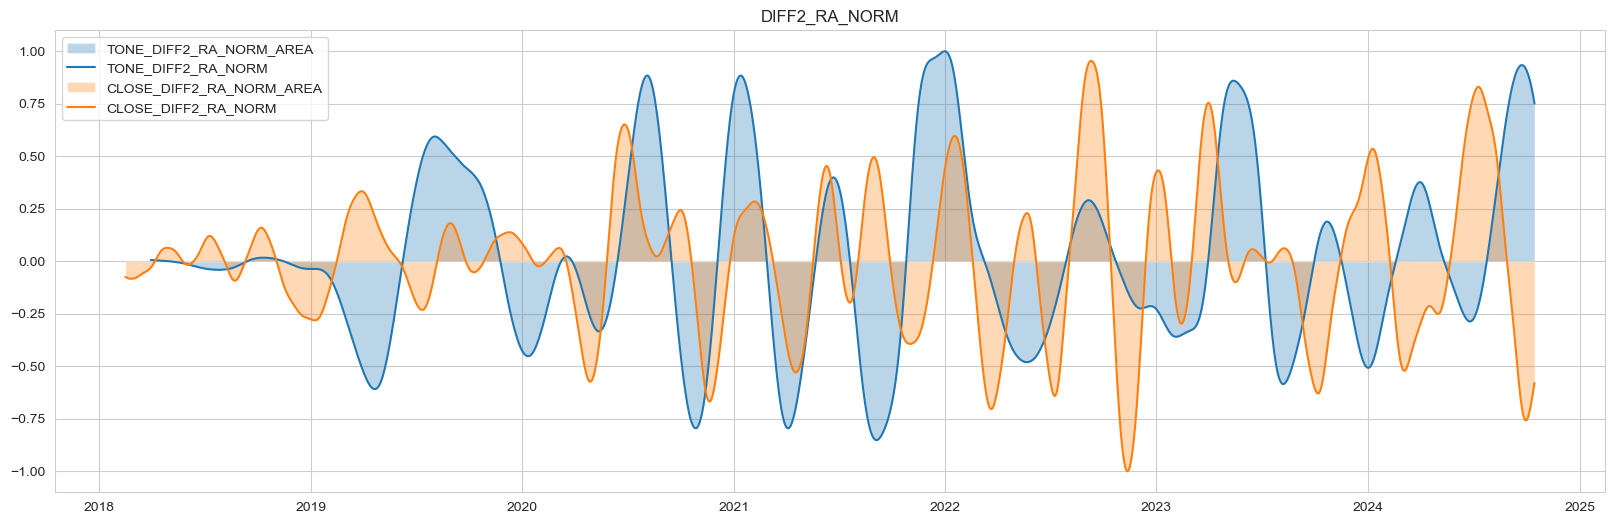

In [212]:
for key, cols in grouped_columns.items():
    plt.figure(figsize=(20, 6))
    plt.title(f'{key}')
    for col in cols:
        if  col.split('_')[0] in ['COUNT', 'GOLDSTEIN']:
            continue

        plt.fill_between(df[col].index, df[col], alpha=0.3, label=f'{col}_AREA')
        plt.plot(df[col], label=f'{col}')
    plt.legend()
    plt.show()

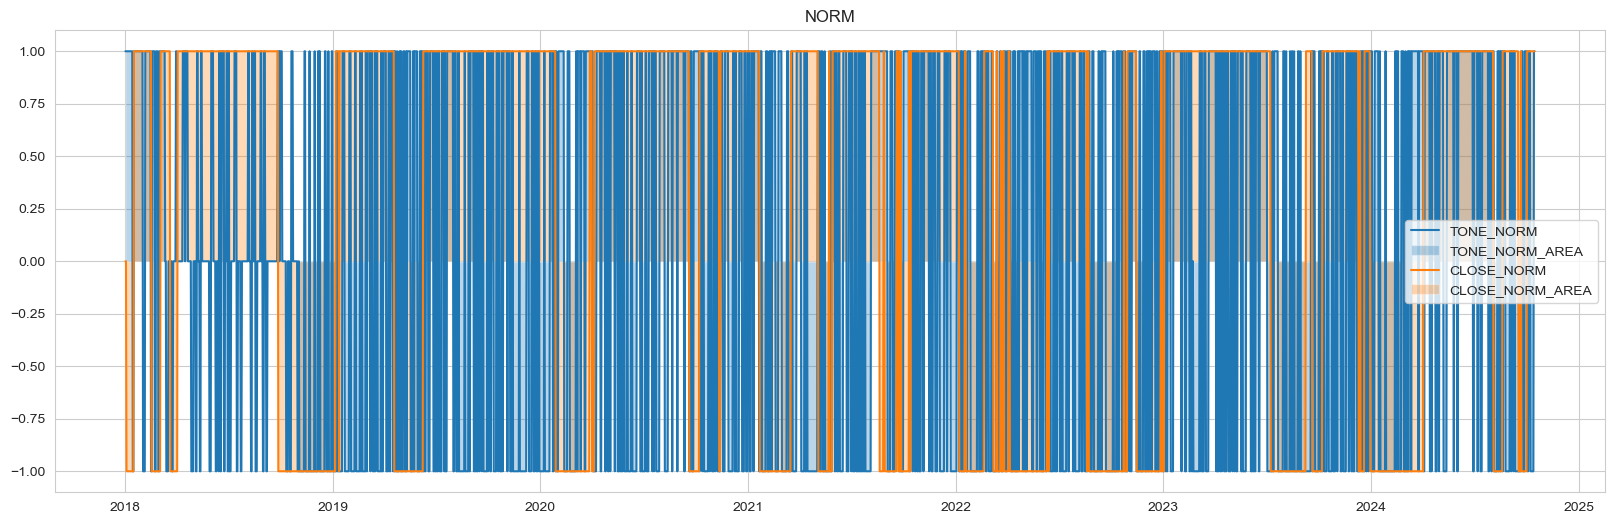

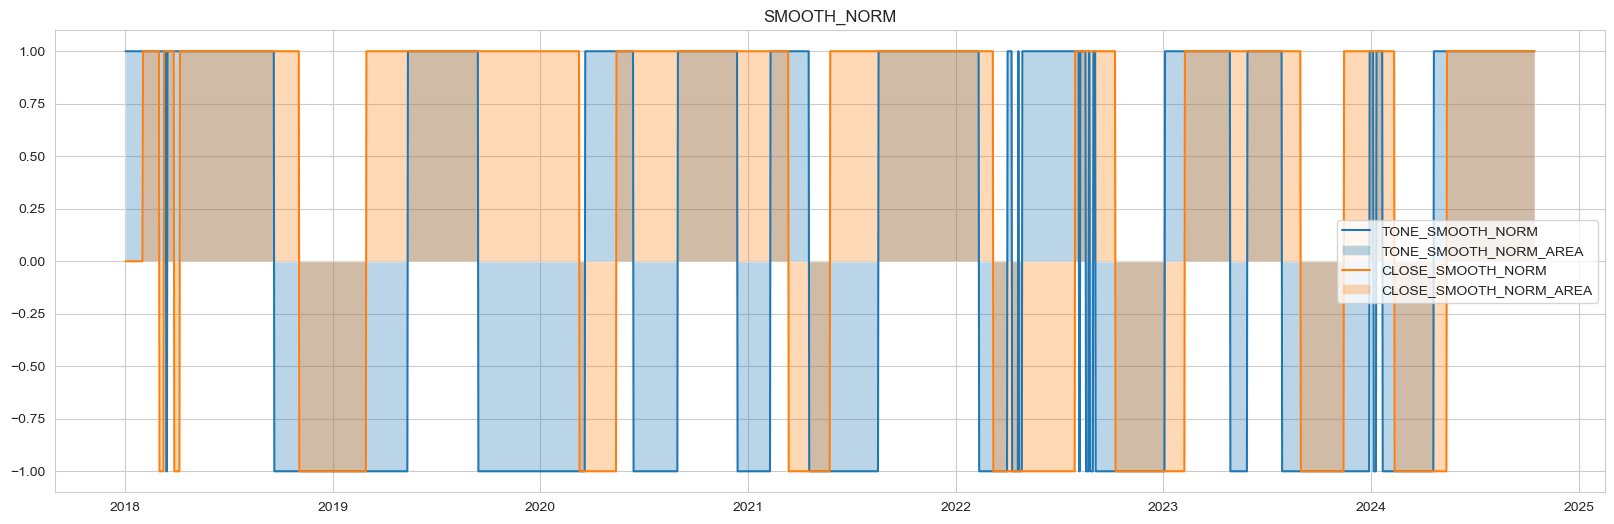

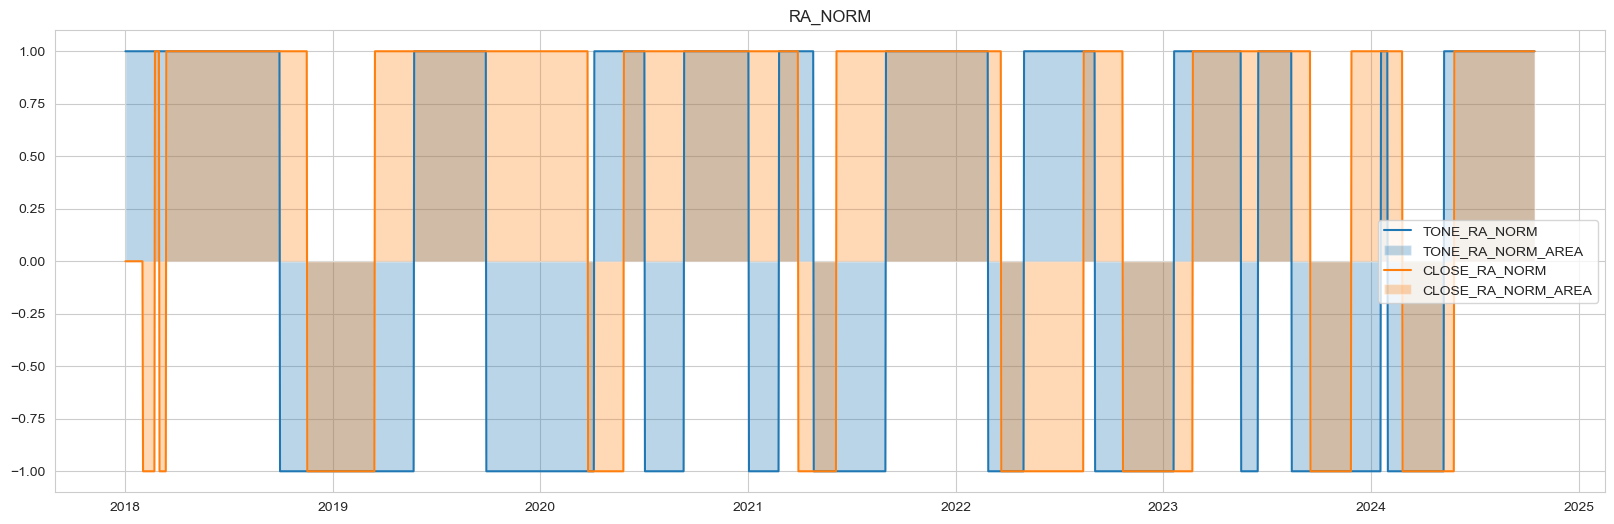

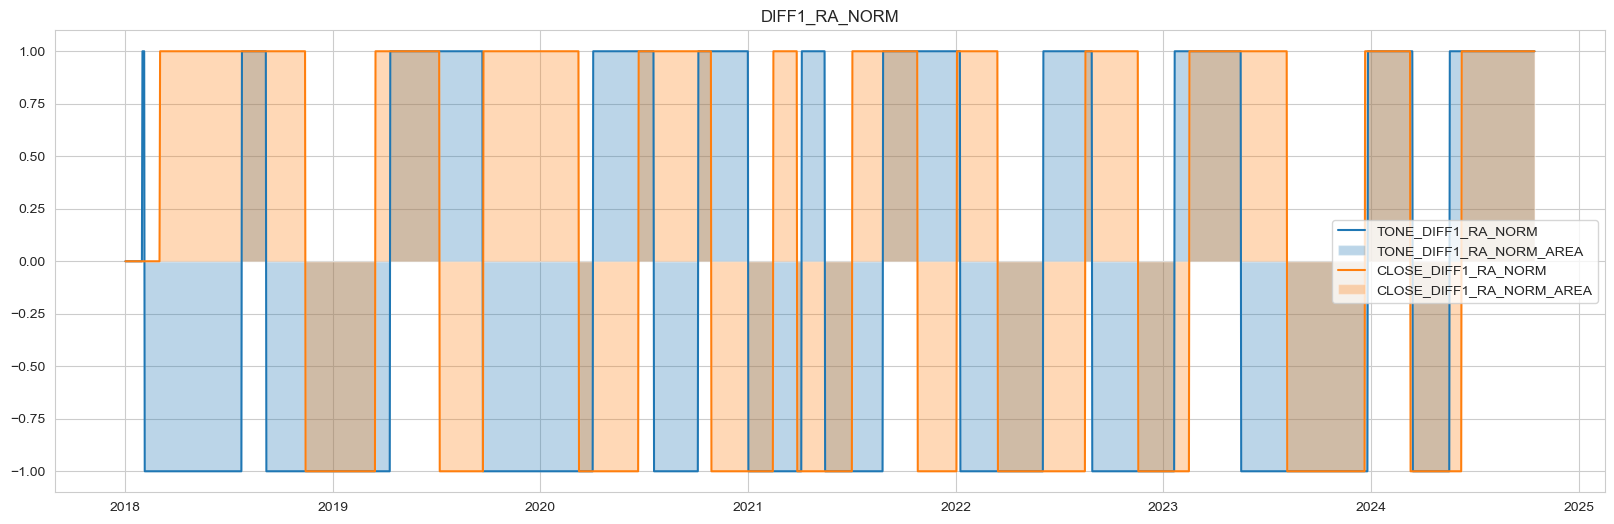

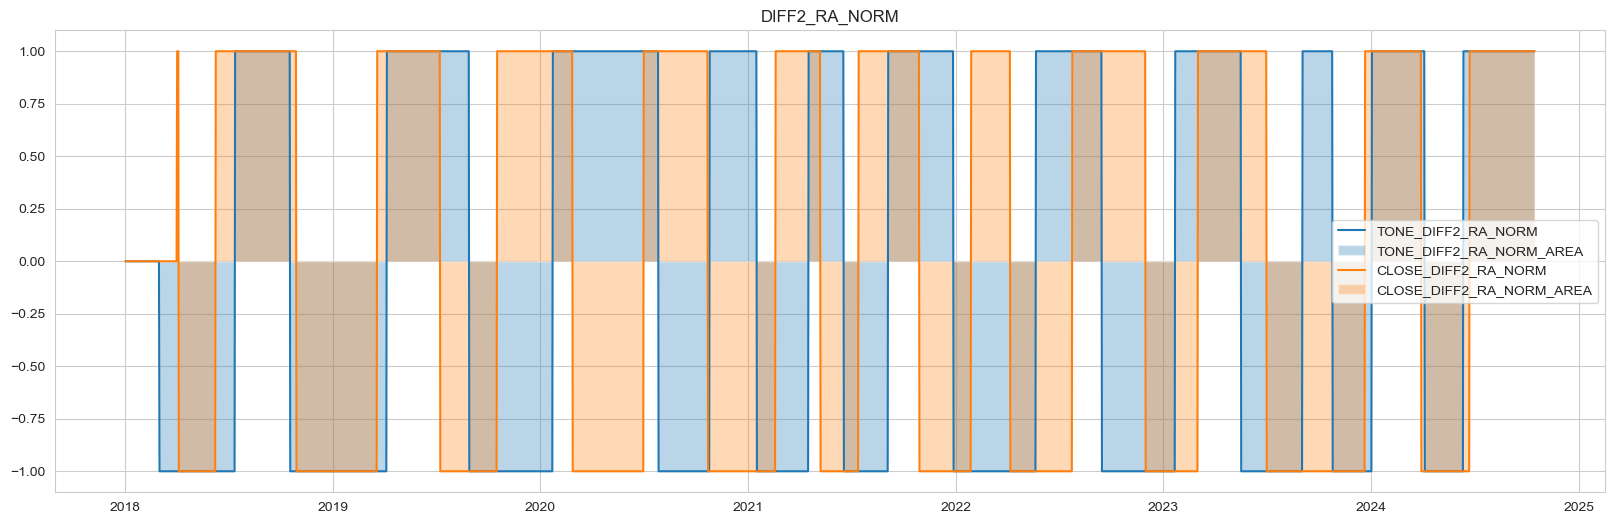

In [206]:
for key, cols in grouped_columns.items():
    plt.figure(figsize=(20, 6))
    plt.title(f'{key}')

    for col in cols:
        if  col.split('_')[0] in ['COUNT', 'GOLDSTEIN']:
            continue
        
        if 'CLOSE' == col.split('_')[0]:
            clamped_values = clamp_gradient_smooth(df[col], window_size=60)
        else:
            clamped_values = clamp_gradient_smooth(df[col])
            
        plt.plot(clamped_values, label=f'{col}')  # Plot the clamped gradient
        plt.fill_between(clamped_values.index, clamped_values, alpha=0.3, label=f'{col}_AREA')

    plt.legend()
    plt.show()

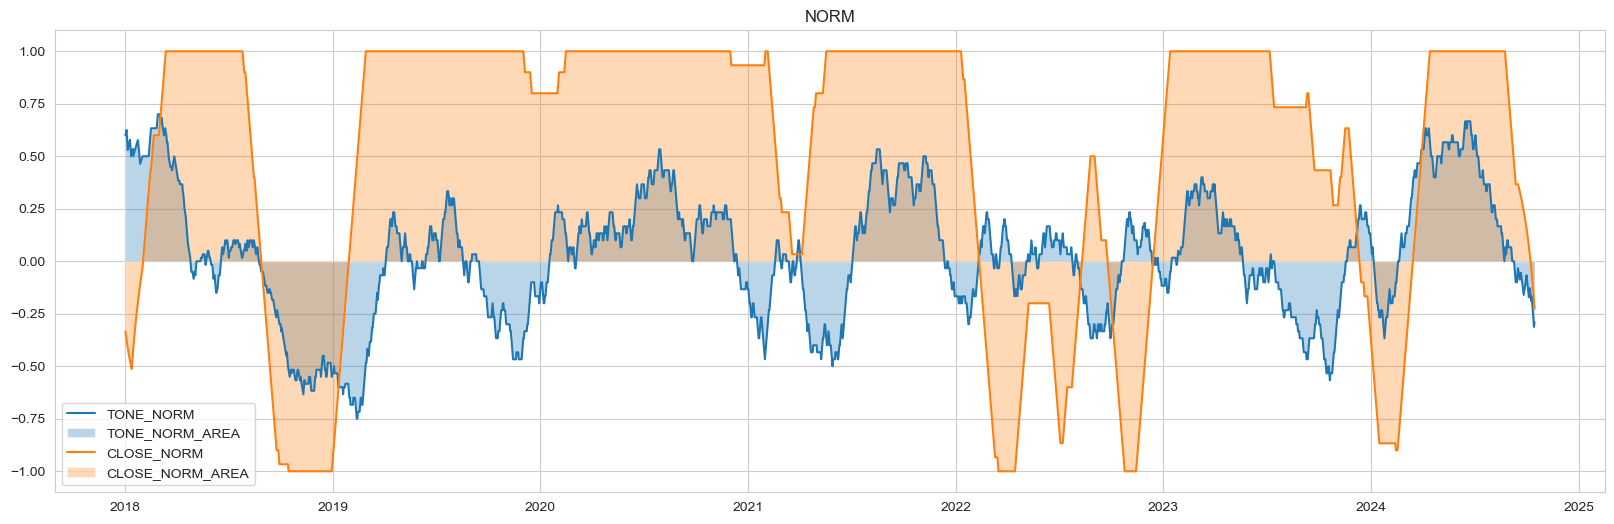

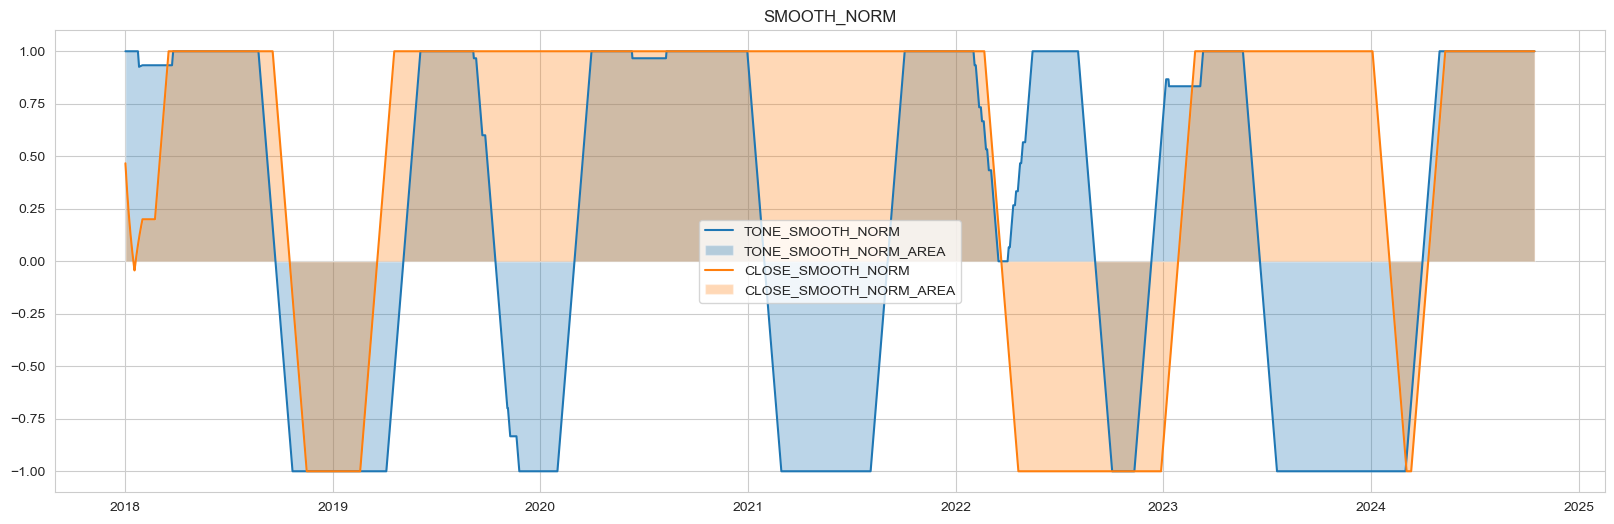

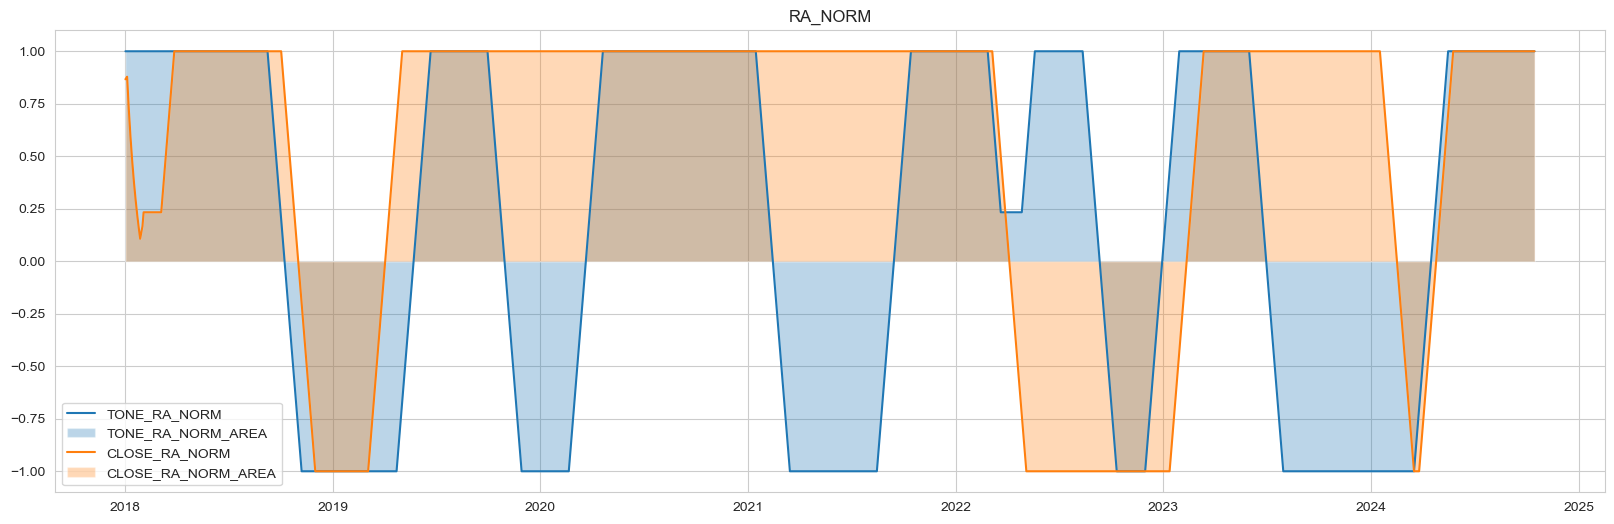

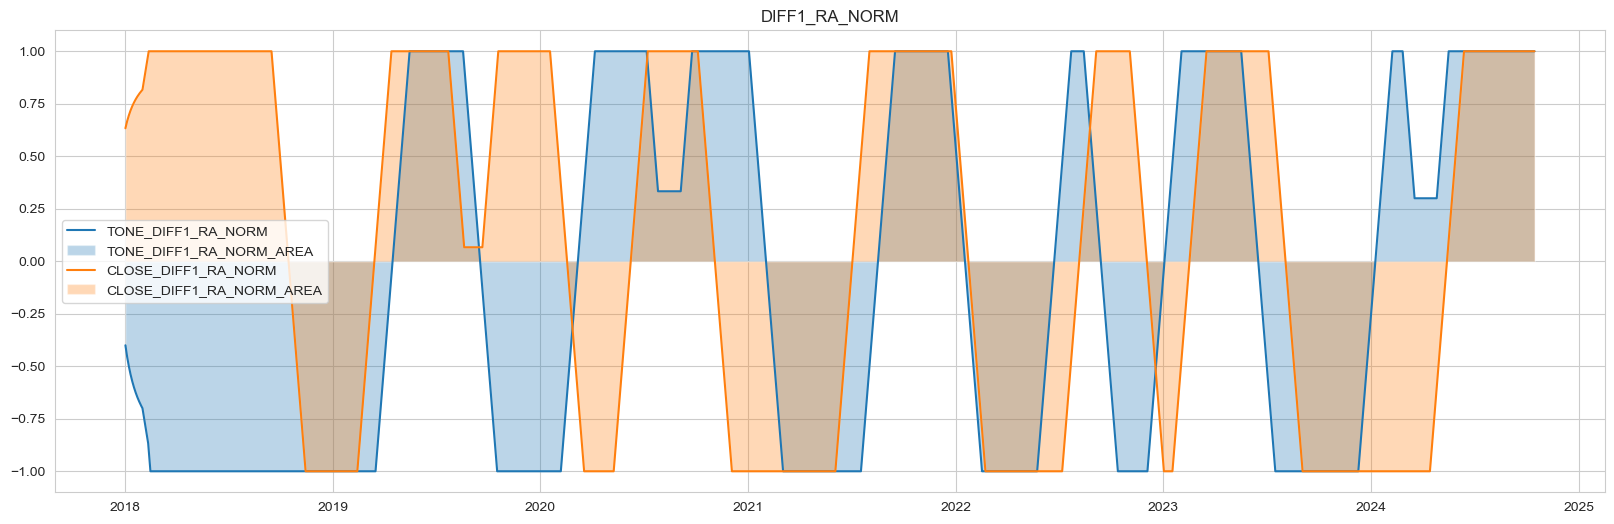

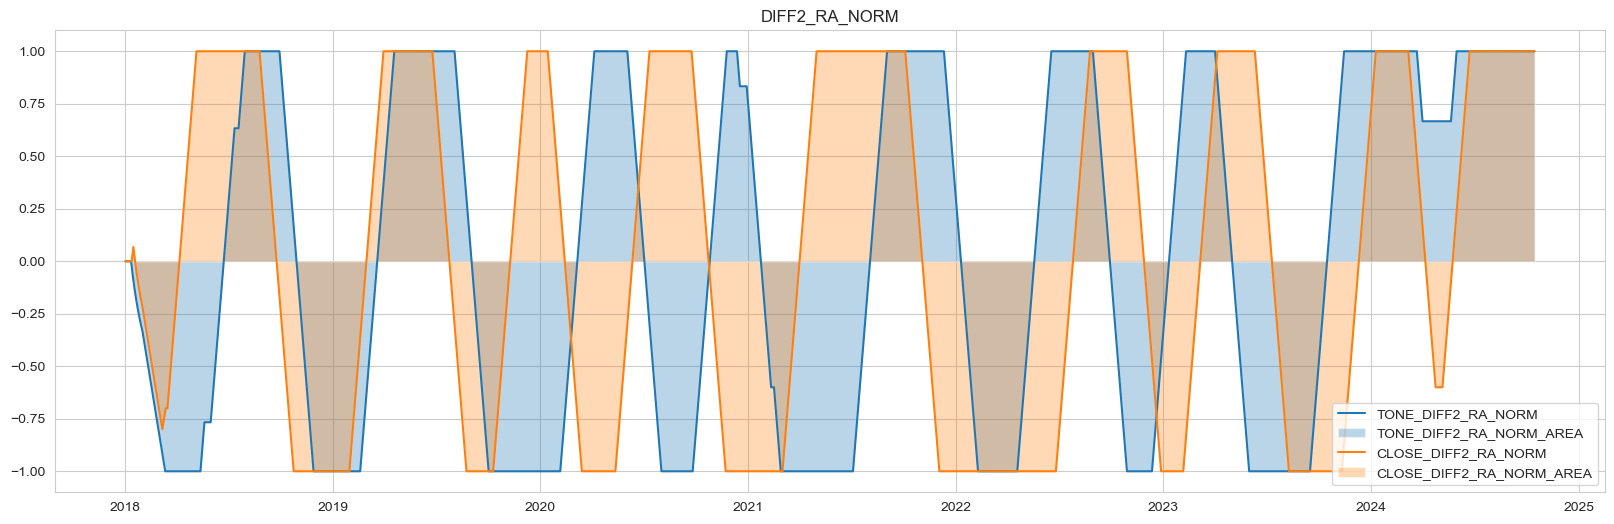

In [207]:
for key, cols in grouped_columns.items():
    plt.figure(figsize=(20, 6))
    plt.title(f'{key}')

    for col in cols:
        if col.split('_')[0] in ['COUNT', 'GOLDSTEIN']:
            continue
        
        # SMOOTHED CLAMP ACCELERATION
        clamped_values = clamp_gradient_smooth(df[col], window_size=160)
        smoothed_values = smooth(clamped_values, window_size=60)
        plt.plot(smoothed_values, label=f'{col}')
        plt.fill_between(smoothed_values.index, smoothed_values, alpha=0.3, label=f'{col}_AREA')
        
    
    plt.legend(loc='upper right')
    plt.show()  # Show the plot